# Dota 2: игровая аналитика

## Цель проекта:

Необходимо подготовить данные для data science команды. В нашем распоряжении данные по игрокам, героям, матчам и регионам online игры Dota2. Нам предстоит провести исследовательский анализ данных, сформулировать и проверить гипотезы, оценить какие факторы могут влиять на победу в матче. Все это позволит команде data science точнее настроить модель предсказания результатов матчей в игре на основании результатов нашего анализа данных.

**Описание данных**

Таблица players - информация об игроках.

- match_id — Идентификатор матча
- player_slot — Слот игрока в матче
- steam_id — Идентификатор аккаунта игрока
- personaname — Имя игрока
- assists — Количество ассистов в матче (помощь в убийстве)
- deaths — Количество смертей в матче
- denies — количество убитых союзных мобов
- gold_per_min — Количество золота, которое игрок получает за минуту в матче
- hero_id — Идентификатор героя игрока
- item_0 — предмет 1
- item_1 — Предмет 2
- item_2 — предмет 3
- item_3 — Предмет 4
- item_4 — Предмет 5
- item_5 — Предмет 6
- kills — Количество убийств в матче
- xp_per_min — Количество опыта за минуту в матче
- isRadiant — Фракция: radiant / dire
- win — Победа 0 / 1
- kills_per_min — Количество убийств за минуту матча
- last_hits_per_min — Количество последних ударов по мобам за минуту матча (влияет на золото)
- hero_damage_per_min — средний урон героя в минуту матча
- hero_healing_per_min — среднее лечение героя в минуту матча
- tower_damage_per_min — Количество урона башен в минуту матча

Таблица heroes - информация о героях.

- id — Идентификатор героя
- localized_name — Имя героя
- attack_type — Тип атаки героя
- primary_attr — Основной атрибут героя
- roles — Роли героя
- base_health — Базовое здоровье
- base_health_regen — Базовая регенерация здоровья
- base_mana — Базовая мана
- base_mana_regen — Базовая регенерация маны
- base_armor — Базовая броня
- base_mr — Сопротивляемость магии (magic resist)
- base_attack_min — Базовая минимальная атака (урон)
- base_attack_max — Базовая максимальная атака (урон)
- base_str — Базовая сила
- base_agi — Базовая ловкость
- base_int — Базовый интеллект
- str_gain — Рост силы с уровнем
- agi_gain — Рост ловкости с уровнем
- int_gain — Рост интеллекта с уровнем
- attack_range — Дистанция атаки
- projectile_speed — Скорость стрельбы
- attack_rate — Скорость атаки
- base_attack_time — Время базовой атаки
- attack_point — Время до начала атаки героя
- move_speed — Скорость передвижения
- turn_rate — Скорость поворота
- cm_enabled — Капитанский режим (включен/выключен)
- legs — Количество ног
- day_vision — Радиус видимости днем
- night_vision — Радиус видимости ночью

Таблица matches - информация о матчах
- match_id — Идентификатор матча
- duration — Длительность матча в секундах
- first_blood_time — Время до первого убийства
- radiant_win — Какая фракция победила
- region — Идентификатор региона


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import statistics as st
import warnings
from collections import Counter
from IPython.display import Image
import plotly.express as px
import plotly
from plotly.subplots import make_subplots
from scipy.stats import mannwhitneyu

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Настройка стиля с удалением верхней и правой границ
sns.set_style("ticks", {"axes.spines.top": False, "axes.spines.right": False})
# Установка контекста и размеров графиков по умолчанию
sns.set_context("notebook", rc={"figure.figsize": (10, 6)})


In [ ]:
players = pd.read_csv('https://drive.google.com/uc?export=download&id=1qM--FFsx_FalDCpMiM3ccGRyTMURuG2q')
matches = pd.read_csv('https://drive.google.com/uc?export=download&id=1XmoKagn6y5lBgFIpcXxZ2UcaVyefzphn')
heroes = pd.read_csv('https://drive.google.com/uc?export=download&id=167TJ7c6IeUq4okQOT2hDCTrc5NfbgGvJ')
regions = pd.read_csv('https://drive.google.com/uc?export=download&id=1rVD9LTIS3dv5V5FM8htgTgxvimOsNIYc')

## 1. Предобработка данных

Посмотрим на наши данные

In [ ]:
def show_info(df):
    display(df.head())

    print(df.info())
    print("Проверка на пропуски:")
    display(df.isnull().sum())

    print("Проверка на дубликаты:")
    if (duplicated := df.duplicated(keep=False)).any():
        some_duplicates = df[duplicated].sort_values(by=df.columns.to_list()).head()
        print(f"DataFrame содержит одну или несколько дублирующихся строк, например:\n{some_duplicates}")
    else:
        print("В DataFrame нет дублирующихся строк.")

In [ ]:
show_info(players)

,index,match_id,player_slot,steam_id,personaname,assists,deaths,denies,gold_per_min,hero_id,...,item_5,kills,xp_per_min,isRadiant,win,kills_per_min,last_hits_per_min,hero_damage_per_min,hero_healing_per_min,tower_damage_per_min
0,0,7723956234,0,1533145710,Snémaât,10,3,7,615,123,...,Mjollnir,6,696,True,1,0.20,9.05,585.55,0.00,304.07
1,1,7723956234,1,1300455837,BeNnS,4,2,7,532,86,...,Phylactery,9,611,True,1,0.29,6.35,622.33,0.00,41.28
2,2,7723956234,2,288327980,Flint-,10,8,2,551,52,...,Aegis of the Immortal,4,608,True,1,0.13,7.36,478.57,0.00,209.17
3,3,7723956234,3,1479402527,shogeyuu,9,3,8,383,51,...,Arcane Boots,5,463,True,1,0.16,3.52,313.64,4.07,45.97
4,4,7723956234,4,1479790131,sonlin,12,6,3,336,88,...,Unknown Item,5,417,True,1,0.16,2.28,521.35,0.00,15.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18020 entries, 0 to 18019
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 18020 non-null  int64  
 1   match_id              18020 non-null  int64  
 2   player_slot           18020 non-null  int64  
 3   steam_id              18020 non-null  int64  
 4   personaname           17896 non-null  object 
 5   assists               18020 non-null  int64  
 6   deaths                18020 non-null  int64  
 7   denies                18020 non-null  int64  
 8   gold_per_min          18020 non-null  int64  
 9   hero_id               18020 non-null  int64  
 10  item_0                18020 non-null  object 
 11  item_1                18020 non-null  object 
 12  item_2                18020 non-null  object 
 13  item_3                18020 non-null  object 
 14  item_4                18020 non-null  object 
 15  item_5             

,0
index,0
match_id,0
player_slot,0
steam_id,0
personaname,124
assists,0
deaths,0
denies,0
gold_per_min,0
hero_id,0


Проверка на дубликаты:
В DataFrame нет дублирующихся строк.


В players 18020 строк, 25 столбцов, пропуски в personaname, явных дубликатов нет,типы данных соответствуют даным.

In [ ]:
show_info(matches)

,index,match_id,duration,first_blood_time,radiant_win,region
0,0,7723956234,1843,0,True,3
1,1,7723925265,1782,74,False,5
2,2,7723923401,2054,71,False,3
3,3,7723905806,2066,40,False,3
4,4,7723895005,1804,169,False,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1802 non-null   int64 
 1   match_id          1802 non-null   int64 
 2   duration          1802 non-null   int64 
 3   first_blood_time  1802 non-null   int64 
 4   radiant_win       1802 non-null   bool  
 5   region            1802 non-null   object
dtypes: bool(1), int64(4), object(1)
memory usage: 72.3+ KB
None
Проверка на пропуски:


,0
index,0
match_id,0
duration,0
first_blood_time,0
radiant_win,0
region,0


Проверка на дубликаты:
В DataFrame нет дублирующихся строк.


В matches 1802 строки, 6 столбцов, пропусков и явных дубликатов нет.

Приведем данные в столбце region к числовому типу, сначала посмотрим на значения


In [ ]:
matches['region'].unique()

array(['3', '5', '8', '17', '13', '38', '2', 'unknown', '15'],
      dtype=object)

Заменим 'unknown' на 0 в столбце и приведем к числовому типу

In [ ]:
# Преобразование столбца region в числовой формат
matches['region'] = pd.to_numeric(matches['region'], errors='coerce')

# Заполняем NaN значением 0 перед преобразованием в int
matches['region'] = matches['region'].fillna(0).astype(int)

In [ ]:
matches['region'].unique()

array([ 3,  5,  8, 17, 13, 38,  2,  0, 15])

Переведем значения в столбце duration  в минуты

In [ ]:
matches['duration'] = matches['duration']//60

In [ ]:
show_info(heroes)

,index,id,localized_name,attack_type,primary_attr,roles,base_health,base_health_regen,base_mana,base_mana_regen,...,projectile_speed,attack_rate,base_attack_time,attack_point,move_speed,turn_rate,cm_enabled,legs,day_vision,night_vision
0,0,123,Hoodwink,Ranged,agi,"['Support', 'Nuker', 'Escape', 'Disabler']",120,0.25,75,0.00,...,1800,2.00,100,0.40,310,0.90,True,4,1800,800
1,1,86,Rubick,Ranged,int,"['Support', 'Disabler', 'Nuker']",120,0.25,75,0.50,...,1125,1.70,100,0.40,290,0.70,True,2,1800,800
2,2,52,Leshrac,Ranged,int,"['Carry', 'Support', 'Nuker', 'Pusher', 'Disab...",120,0.25,75,0.00,...,900,1.70,100,0.40,325,NaN,True,4,1800,800
3,3,51,Clockwerk,Melee,all,"['Initiator', 'Disabler', 'Durable', 'Nuker']",120,0.50,75,0.00,...,900,1.70,100,0.33,310,NaN,True,2,1800,800
4,4,88,Nyx Assassin,Melee,all,"['Disabler', 'Nuker', 'Initiator', 'Escape']",120,2.00,75,0.00,...,900,1.70,100,0.46,310,NaN,True,6,1800,800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18020 entries, 0 to 18019
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              18020 non-null  int64  
 1   id                 18020 non-null  int64  
 2   localized_name     18020 non-null  object 
 3   attack_type        18020 non-null  object 
 4   primary_attr       18020 non-null  object 
 5   roles              18020 non-null  object 
 6   base_health        18020 non-null  int64  
 7   base_health_regen  18020 non-null  float64
 8   base_mana          18020 non-null  int64  
 9   base_mana_regen    18020 non-null  float64
 10  base_armor         18020 non-null  float64
 11  base_mr            18020 non-null  int64  
 12  base_attack_min    18020 non-null  int64  
 13  base_attack_max    18020 non-null  int64  
 14  base_str           18020 non-null  int64  
 15  base_agi           18020 non-null  int64  
 16  base_int           180

,0
index,0
id,0
localized_name,0
attack_type,0
primary_attr,0
roles,0
base_health,0
base_health_regen,0
base_mana,0
base_mana_regen,0


Проверка на дубликаты:
В DataFrame нет дублирующихся строк.


In [ ]:
heroes['primary_attr'].unique()

array(['agi', 'int', 'all', 'str'], dtype=object)

В heroes 18020 строк, 5 столбцов, пропуски в столбце turn_rate,  явных дубликатов нет. Посмотрим на неявные дубликаты.

In [ ]:
heroes['localized_name'].nunique()

124

Всего 124 уникальных героев в 1802 матчах. Удалим дубликаты по имени героя.

In [ ]:
heroes = heroes.drop_duplicates(subset='localized_name').reset_index(drop=True)

## 2. Исследовательский анализ данных

Проверим есть ли корреляция между числовыми параметрами (опыт, золото, количество убийств..) и победой в матче

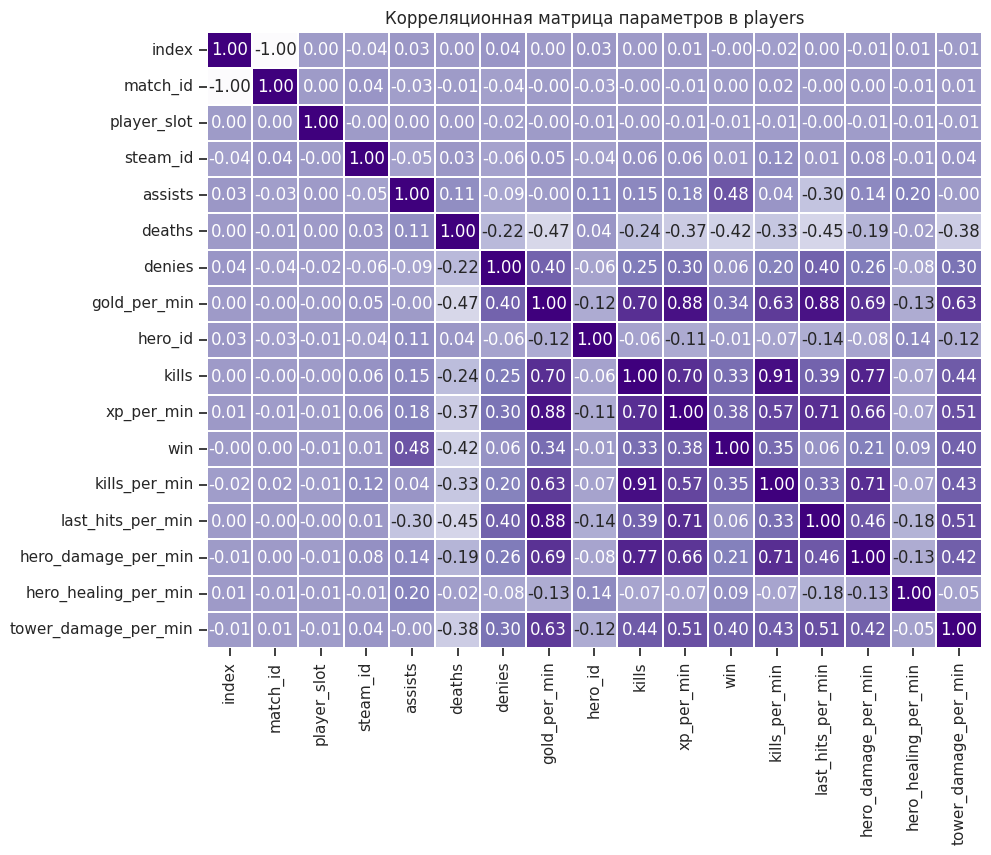

In [ ]:
# Фильтрация столбцов
num_cols = []

for col in players.columns:
    if players[col].dtype in ['int64', 'float64']:
        num_cols.append(col)
# Вычислим корреляционную матрицу только для этих столбцов
corr_matrix = players[num_cols].corr()
# Выведем корреляции столбца 'win' с другими параметрами
corr_with_win = corr_matrix['win'].sort_values(ascending=False)
# Построим тепловую карту для всей корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Purples', linewidths=0.2,  cbar=False)
plt.title('Корреляционная матрица параметров в players')
plt.show()

In [ ]:
# Выведем корреляции на экран
print("Корреляции с параметром 'win':")
print(corr_with_win)

Корреляции с параметром 'win':
win                     1.00
assists                 0.48
tower_damage_per_min    0.40
xp_per_min              0.38
kills_per_min           0.35
gold_per_min            0.34
kills                   0.33
hero_damage_per_min     0.21
hero_healing_per_min    0.09
last_hits_per_min       0.06
denies                  0.06
steam_id                0.01
match_id                0.00
index                  -0.00
hero_id                -0.01
player_slot            -0.01
deaths                 -0.42
Name: win, dtype: float64


Выводы по коэффициентам корреляции с параметром win:

Положительная корреляция:
* Ассисты (0.48): Сильная положительная корреляция, что указывает на то, что команды с большим количеством ассистов имеют более высокие шансы на победу.
* Урон по башням за минуту (0.40): Значительная положительная корреляция. Команды, наносящие больше урона башням, чаще побеждают.
* Опыт за минуту (0.38): Чем больше опыта получают игроки в минуту, тем выше вероятность победы.
* Убийства за минуту (0.35) и Общее количество убийств (0.33): Убийства также существенно влияют на исход матча. Команды с большим количеством убийств, как в минуту, так и в целом, имеют больше шансов на победу.
* Золото за минуту (0.34): Фарм золота также положительно коррелирует с победой.
* Урон герою за минуту (0.21): Урон, нанесенный героям, также положительно влияет на победу, хотя и не столь значительно.
* Лечение героев за минуту (0.09): Лечение имеет слабую, но все же положительную корреляцию с победой.

Отсутствие значимой корреляции:
* Количество добитых крипов за минуту (0.06) и Денаи (0.06): Эти параметры имеют очень слабую положительную корреляцию с победой.
* Фракция Radiant (0.01): Незначительная положительная корреляция, что указывает на отсутствие существенной разницы в победах между командами Radiant и Dire.

Отрицательная корреляция:
* Смерти (-0.42): Сильная отрицательная корреляция. Чем больше смертей у команды, тем меньше шансов на победу.
* Слот игрока (-0.01): Незначительная отрицательная корреляция, что указывает на то, что позиция игрока в команде не оказывает существенного влияния на исход матча.

В общем, можно сделать вывод, что успешные команды часто демонстрируют высокие показатели по ассистам, нанесению урона (особенно башням), накоплению опыта и золота, а также по количеству убийств. В то же время, большое количество смертей значительно снижает шансы на победу.

Построим гистограммы основных параметров матчей (убийство, ассист, урон в минуту...) в разрезе победивших и проигравших команд.

In [ ]:
winner = players[players['win'] == 1]
players_win = winner.groupby('match_id').agg({'assists': 'sum',
                                               'deaths': 'sum',
                                               'kills': 'sum',
                                               'gold_per_min': 'sum',
                                               'denies': 'sum',
                                               'xp_per_min': 'sum',
                                               'isRadiant': 'first',
                                               'kills_per_min': 'sum',
                                               'last_hits_per_min': 'sum',
                                               'hero_damage_per_min': 'sum',
                                               'hero_id': 'unique',
                                               'tower_damage_per_min': 'sum'}).reset_index()

In [ ]:
loser = players[players['win'] == 0]
players_lose = loser.groupby('match_id').agg({'assists': 'sum',
                                               'deaths': 'sum',
                                               'kills': 'sum',
                                               'gold_per_min': 'sum',
                                               'denies': 'sum',
                                               'xp_per_min': 'sum',
                                               'isRadiant': 'first',
                                               'kills_per_min': 'sum',
                                               'last_hits_per_min': 'sum',
                                               'hero_damage_per_min': 'sum',
                                               'hero_id': 'unique',
                                               'tower_damage_per_min': 'sum'}).reset_index()

Основываясь на правиле Стерджеса, для гистограмм выберем количесвто корзин = 12

In [ ]:
def plot_feature_histogram(players_win, players_lose, feature, bins=12):
    plt.figure(figsize=(9, 5))
    # Построение гистограммы для победивших команд
    sns.histplot(players_win[feature], color='#ffbb78', label='Победители',
                 stat='density', common_norm=False, kde=True, bins=bins, alpha=0.6)
    # Построение гистограммы для проигравших команд
    sns.histplot(players_lose[feature], color='#9467bd', label='Проигравшие',
                 stat='density', common_norm=False, kde=True, bins=bins, alpha=0.6)
    # Добавление вертикальной линии для медианы победителей
    plt.axvline(players_win[feature].median(), color='#ff7f0e', linestyle='--', label='Медиана победителей')
    # Добавление вертикальной линии для медианы проигравших
    plt.axvline(players_lose[feature].median(), color='#8c564b', linestyle='--', label='Медиана проигравших')

    plt.title(f'Распределение {feature} для победивших и проигравших команд')
    plt.xlabel(feature)
    plt.ylabel('Плотность')
    # Перемещение легенды за пределы графика
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
    plt.show()


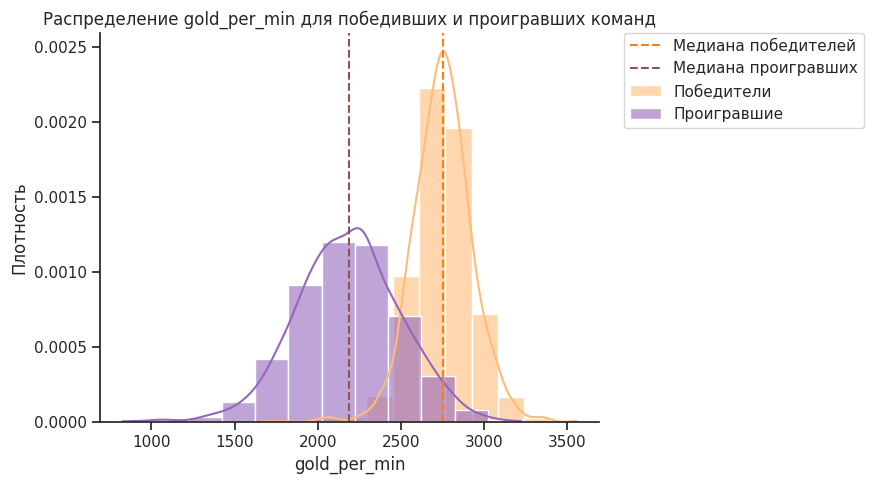

In [ ]:
plot_feature_histogram(players_win, players_lose, 'gold_per_min')

* Медианное значение: У победивших команд медианное значение gold_per_min (золота в минуту) выше, чем у проигравших. Это говорит о том, что победители, в среднем, зарабатывают больше золота в минуту.
* Форма распределения: Распределение для проигравших команд (фиолетовая линия) смещено влево и имеет большее количество игроков с низкими значениями gold_per_min. У победивших команд распределение (оранжевая линия) смещено вправо, и наблюдается больше игроков с высокими значениями золота в минуту.
* Разброс данных: У победивших команд наблюдается более узкий диапазон значений, что может говорить о большей консистентности в заработке золота среди игроков этой категории. Проигравшие имеют более широкий разброс.

Это может свидетельствовать о том, что команды, зарабатывающие больше золота в минуту, имеют значительно лучшие шансы на победу.

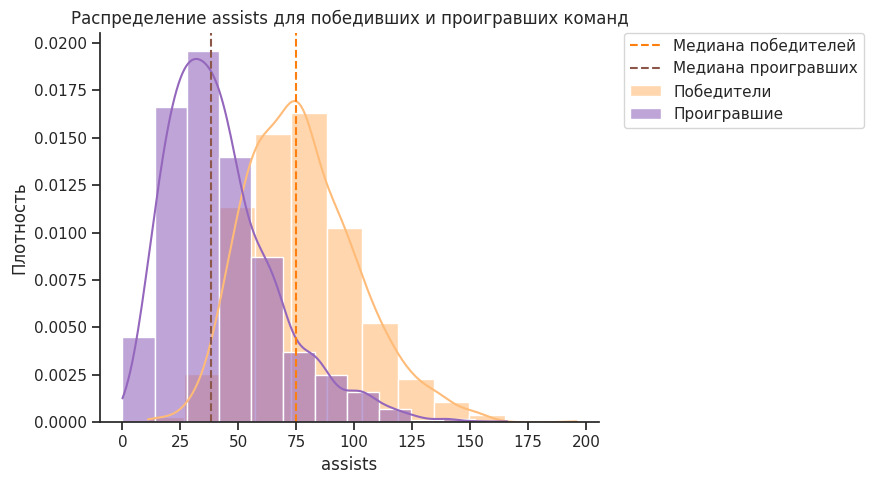

In [ ]:
plot_feature_histogram(players_win, players_lose, 'assists')

* Медианное значение: У победивших команд медианные значения assists выше, чем у проигравших. Это говорит о том, что победители, как правило, делают больше ассистов.
* Форма распределения: Распределение для проигравших команд (фиолетовая линия) смещено влево и более сконцентрировано на меньших значениях ассистов. У победивших команд (оранжевая линия) распределение более растянуто с большим количеством игроков, имеющих высокие значения ассистов.
* Разброс данных: Проигравшие команды имеют более узкое распределение, что указывает на меньшую вариативность в количестве ассистов среди игроков. У победивших команд разброс значений больше, что может свидетельствовать о более активной командной игре.

Таким образом, можно сделать вывод, что команды, делающие больше ассистов, имеют больше шансов на победу, так как ассисты могут свидетельствовать о лучшей командной координации.

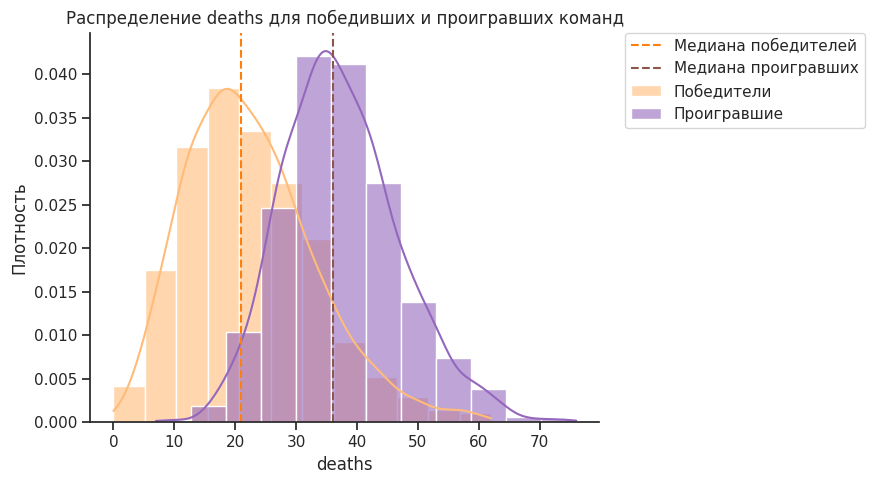

In [ ]:
plot_feature_histogram(players_win, players_lose, 'deaths')

* Медианное значение: У проигравших команд медианные значения deaths выше, чем у победивших. Это свидетельствует о том, что проигравшие команды, как правило, умирают чаще.
* Форма распределения: У проигравших команд (фиолетовая линия) распределение смещено вправо с пиком около 40 смертей. У победивших команд (оранжевая линия) пик приходится на меньшее количество смертей (около 25).
* Разброс данных: Проигравшие команды имеют более широкое распределение смертей, что может говорить о том, что среди проигравших команд некоторые игроки могут умирать очень часто. У победивших команд разброс меньше, что может свидетельствовать о лучшей игре в защите и стратегии.

Таким образом, можно сделать вывод, что команды с меньшим количеством смертей имеют больше шансов на победу, что может указывать на лучшее позиционирование игроков и эффективное использование ресурсов для выживания в игре.

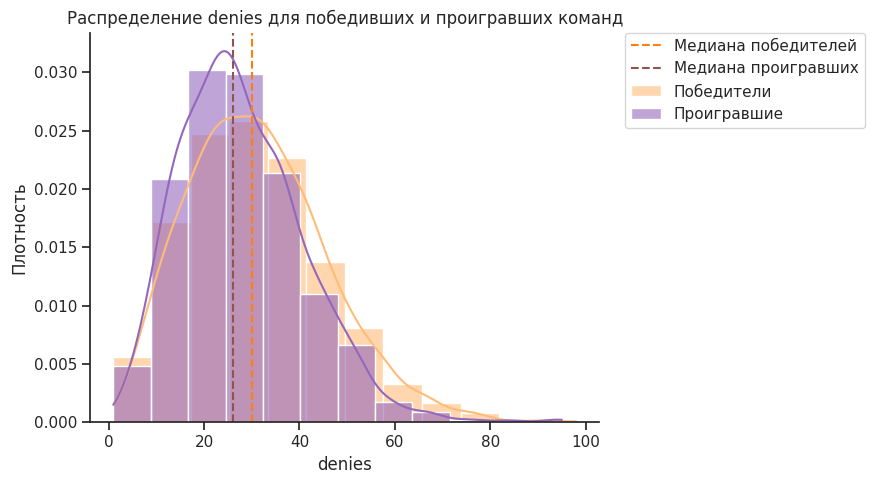

In [ ]:
plot_feature_histogram(players_win, players_lose, 'denies')

* Пик распределения: У обеих групп, победивших и проигравших, пик распределения находится в районе 20 убитых союзных крипов. Это говорит о том, что обе команды активны в этом, но это не является решающим фактором для исхода игры.
* Правый хвост: Победившие команды демонстрируют более длинный хвост, что может означать, что у победителей есть игроки, которые убивают больше союзных крипов. Это может давать им небольшое преимущество, лишая противников ресурсов.
* Различие в средних значениях: Хотя различия есть, они незначительны. Как правило, у победителей показатель чуть больше, но не является доминирующим фактором победы.

В целом, denies могут оказать влияние на исход матча, но этот параметр, по-видимому, не столь критичен для победы, как другие, например, убийства или золото.

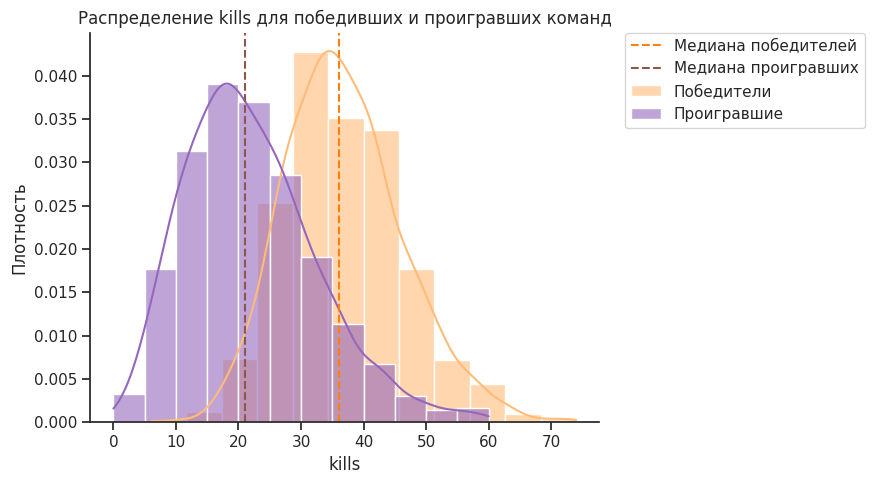

In [ ]:
plot_feature_histogram(players_win, players_lose, 'kills')

* Медиана и пик распределения: У проигравших команд распределение пиковое около 20 убийств, в то время как у победивших — около 35. Это говорит о том, что победившие команды, как правило, совершают значительно больше убийств.
* Правый хвост: Победившие команды демонстрируют более длинный правый хвост, что указывает на возможность гораздо большего количества убийств в отдельных матчах.
* Общее наблюдение: В общем, команды, которые выигрывают, склонны совершать больше убийств, что логично, так как контроль над картой и численное преимущество играют важную роль в исходе игры.

Таким образом, количество убийств явно является одним из факторов, который влияет на исход матча: чем больше убийств команда совершает, тем больше шансов на победу.

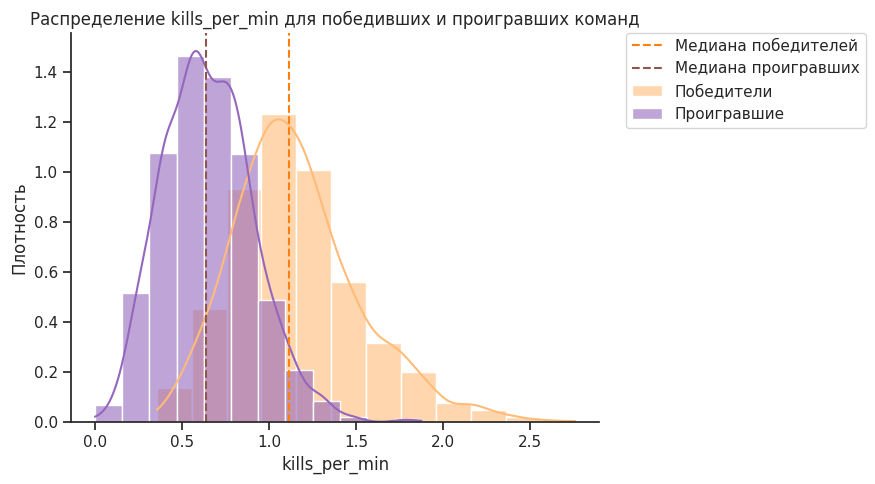

In [ ]:
plot_feature_histogram(players_win, players_lose, 'kills_per_min')

* Медиана и пик распределения: У проигравших команд пик приходится на около 0.6 убийств в минуту, в то время как у победивших — около 1 убийства в минуту. Это показывает, что победившие команды убивают чаще в единицу времени.
* Правый хвост: У победивших команд более длинный правый хвост, что свидетельствует о возможных случаях высокого темпа убийств в отдельных матчах (свыше 1.5 убийств в минуту).
* Общее наблюдение: Победившие команды демонстрируют более агрессивный стиль игры с большим количеством убийств в минуту, что может способствовать их доминированию и победе.

Таким образом, количество убийств в минуту является важным фактором, который влияет на исход матча: победившие команды убивают быстрее и чаще, что повышает их шансы на выигрыш.

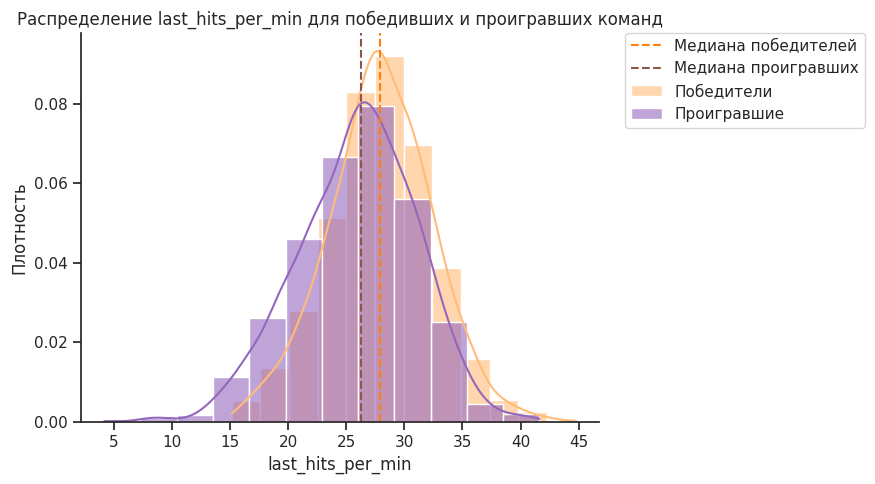

In [ ]:
plot_feature_histogram(players_win, players_lose, 'last_hits_per_min')

* Победившие команды в среднем имеют более высокие значения last_hits_per_min, чем проигравшие.
* Среднее количество добиваний в минуту у победителей немного выше, с пиком около 30, тогда как у проигравших пик приходится на 25.

Это может свидетельствовать о том, что команды с более высоким уровнем фарма, выраженным в добиваниях крипов, имеют преимущество и чаще побеждают.
Таким образом, last_hits_per_min является важным показателем для победы в игре, так как успешные команды лучше справляются с этим элементом игры.

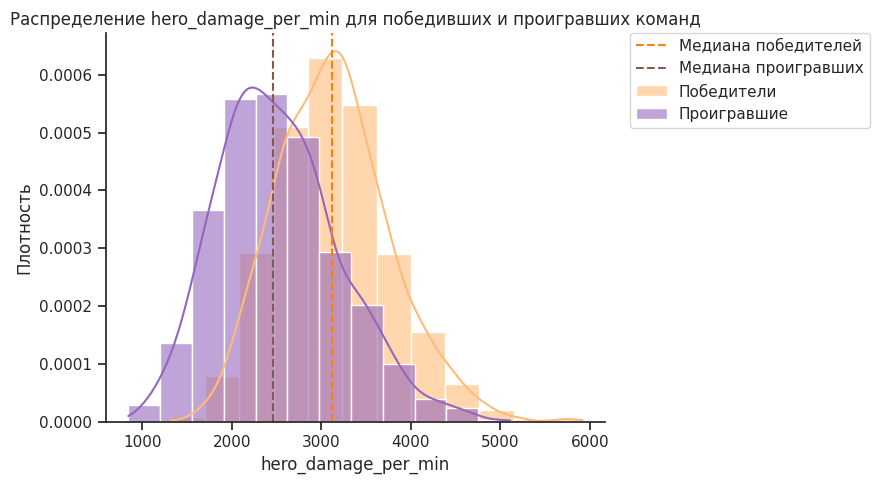

In [ ]:
plot_feature_histogram(players_win, players_lose, 'hero_damage_per_min')

* Победившие команды демонстрируют более высокие значения hero_damage_per_min по сравнению с проигравшими командами.
* Пик у победителей находится в районе 3000-3500 урона в минуту, тогда как у проигравших он ниже, около 2000-2500. Это указывает на то, что команды, наносящие больше урона по противникам в минуту, чаще побеждают.

Таким образом, hero_damage_per_min является важным фактором для достижения победы, так как более высокая способность к нанесению урона может привести к доминированию в боях и успешным исходам матчей.

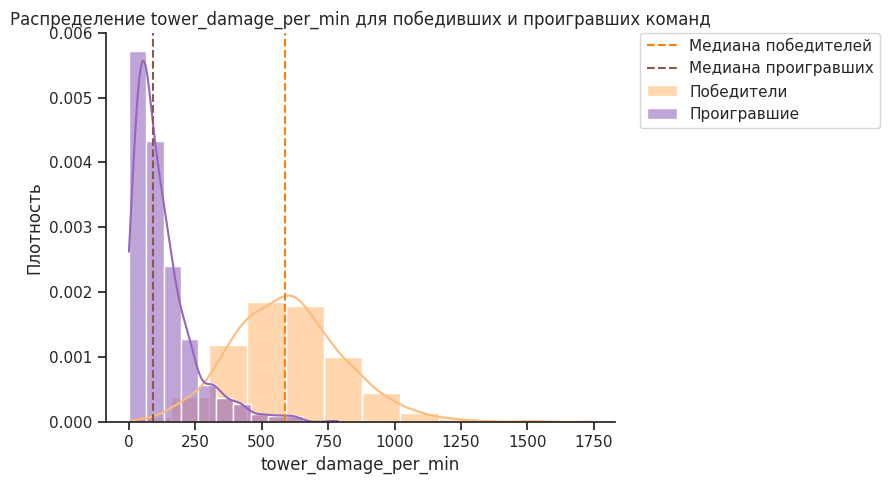

In [ ]:
plot_feature_histogram(players_win, players_lose, 'tower_damage_per_min')

* У победивших команд распределение tower_damage_per_min заметно выше, чем у проигравших. Победители наносят значительно больше урона по башням, особенно в диапазоне от 250 до 750 урона в минуту.
* Проигравшие команды (фиолетовая кривая) сконцентрированы в низких значениях урона, с пиком в районе 0-100 урона в минуту.

Это подтверждает, что нанесение большого урона по башням напрямую связано с вероятностью победы в матче, так как успешное разрушение объектов — ключ к победе в стратегических играх.

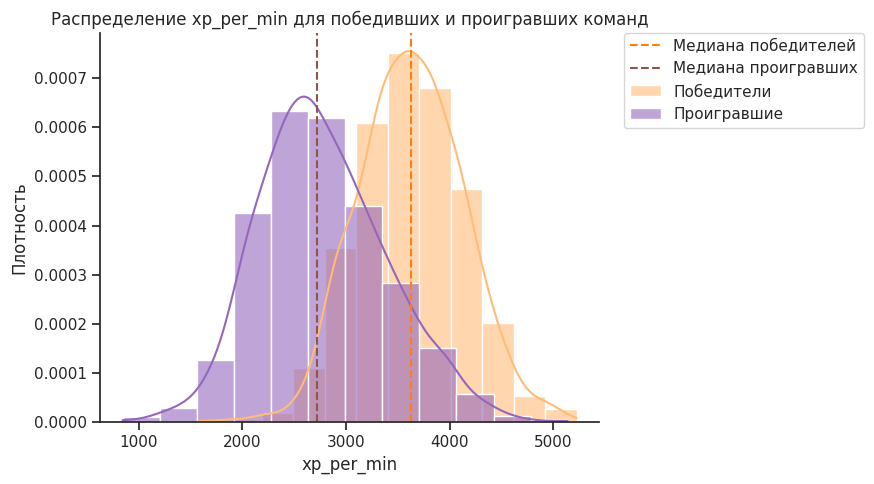

In [ ]:
plot_feature_histogram(players_win, players_lose, 'xp_per_min')

* Игроки победивших команд, как правило, имеют больше опыта в минуту, чем проигравшие, что видно по смещению распределения вправо.
* У проигравших команд пик опыта находится на уровне около 2500–3000 xp_per_min, в то время как у победителей пик выше, около 3500–4000 xp_per_min.

Это подтверждает вывод, что получение большего опыта за минуту может быть связано с более высокой вероятностью победы.

## Ответим на вопрос - какие предметы чаще приводят команду к победе: топ используемых в матчах предметов, в разрезе победителей / проигравших, какие предметы есть у победителей, которых нет у проигравших?

In [ ]:
# Создание списка предметов для каждого игрока
winner['all_items'] = winner.apply(lambda cell: [cell.item_0, cell.item_1, cell.item_2, cell.item_3, cell.item_4], axis=1)
loser['all_items'] = loser.apply(lambda cell: [cell.item_0, cell.item_1, cell.item_2, cell.item_3, cell.item_4], axis=1)

# Преобразование данных в длинный формат для победителей, исключая "Unknown Item"
top_winner_items = [item for sublist in winner['all_items'] for item in sublist if item != 'Unknown Item']

# Преобразование данных в длинный формат для проигравших, исключая "Unknown Item"
top_loser_items = [item for sublist in loser['all_items'] for item in sublist if item != 'Unknown Item']

# Преобразуем списки в Series для удобного подсчета частоты появления предметов
winner_items_series = pd.Series(top_winner_items).value_counts()
loser_items_series = pd.Series(top_loser_items).value_counts()

print(f"\nТоп 10 предметов у победителей:")
print(winner_items_series.head(10))

print(f"\nТоп 10 предметов у проигравших:")
print(loser_items_series.head(10))


Топ 10 предметов у победителей:
Magic Wand           3186
Blink Dagger         2977
Power Treads         2272
Arcane Boots         2143
Black King Bar       1994
Aghanim's Scepter    1560
Phase Boots          1389
Manta Style          1082
Bracer                975
Force Staff           709
Name: count, dtype: int64

Топ 10 предметов у проигравших:
Magic Wand           3674
Blink Dagger         2738
Power Treads         2414
Arcane Boots         2235
Black King Bar       1692
Phase Boots          1426
Bracer               1340
Aghanim's Scepter    1214
Manta Style           956
Wraith Band           865
Name: count, dtype: int64


* Общие предметы: Многие предметы из топ-10 списка победителей и проигравших пересекаются, такие как Magic Wand, Blink Dagger, Power Treads, и Arcane Boots. Эти предметы являются универсальными и часто покупаются игроками, независимо от исхода матча. Это указывает на то, что данные предметы могут быть полезными и в победных, и в проигрышных играх.

* Magic Wand: Этот предмет занимает первое место как среди победителей, так и среди проигравших. Это подтверждает его популярность как начальный предмет из-за его пользы в обеспечении выживаемости и восстановления ресурсов.

* Black King Bar (BKB): Победители чаще покупают Black King Bar (1994 раза против 1692 у проигравших). Это может указывать на важность этого предмета в ключевые моменты игры, так как он обеспечивает неуязвимость к магии, что может быть критично для успешного исхода.

* Aghanim's Scepter: Предмет встречается у победителей значительно чаще (1560 раз) по сравнению с проигравшими (1214 раза). Это говорит о том, что апгрейд героя с помощью Aghanim's может дать преимущество в игре и повлиять на исход.

* Bracer и Wraith Band: Проигравшие чаще покупают предметы начальной выживаемости и статов, такие как Bracer и Wraith Band, что может говорить о попытках компенсировать недостаток ресурсов в начале игры, но недостаточно для победы.

* Различие в выборе предметов: Победители чаще выбирают более дорогие предметы для поздней стадии игры, такие как Manta Style, что может говорить о том, что эти предметы помогают завершить игру успешной атакой.

## Какие предметы есть у победителей, которых нет у проигравших?


In [ ]:
# Подсчет количества каждого предмета у победителей и проигравших
items_comparison = pd.DataFrame({
    'Количество у победителей': pd.Series(top_winner_items).value_counts(),
    'Количество у проигравших': pd.Series(top_loser_items).value_counts()
}).fillna(0)

# Вычисление разницы в долях с обработкой деления на ноль и округлением
items_comparison['Разница (победители - проигравшие)'] = (
    (items_comparison['Количество у победителей'] - items_comparison['Количество у проигравших']) /
    items_comparison['Количество у проигравших'].replace(0, pd.NA)
).fillna(0).round(2)

# Исключение 'Unknown Item' и сортировка по разнице
items_comparison_sorted = items_comparison.drop('Unknown Item', errors='ignore').sort_values(by='Разница (победители - проигравшие)', ascending=False)
display(items_comparison_sorted.head(10))

,Количество у победителей,Количество у проигравших,Разница (победители - проигравшие)
Aegis of the Immortal,172.00,1.00,171.00
Gem of True Sight,379.00,47.00,7.06
Divine Rapier,78.00,12.00,5.50
Cheese,30.00,10.00,2.00
Meteor Hammer,39.00,14.00,1.79
Overwhelming Blink,80.00,30.00,1.67
Satanic,349.00,147.00,1.37
Arcane Blink,44.00,21.00,1.10
Heart of Tarrasque,85.00,41.00,1.07
Swift Blink,101.00,50.00,1.02



Из анализа таблицы можно сделать следующие выводы:

* Aegis of the Immortal: Этот предмет практически не появляется у проигравших (1 раз), в то время как у победителей он встречается 172 раза. Это логично, так как Aegis можно получить только победив Рошана, и его наличие напрямую способствует победе.

* Gem of True Sight: У победителей этот предмет встречается значительно чаще (379 раз против 47 у проигравших). Это может говорить о том, что команды, активно использующие Gem для устранения вардов и контроля карты, получают преимущество в игре.

* Divine Rapier: Победители покупают Divine Rapier гораздо чаще (78 раз против 12 у проигравших). Несмотря на риск этого предмета, он может изменить ход игры, что чаще приводит к победе.

* Cheese: Этот предмет чаще встречается у победителей (30 раз против 10 у проигравших). Как и с Aegis, Cheese можно получить от Рошана, что свидетельствует о том, что контроль над этим объектом имеет большое значение для победы.

* Различия в Blink Dagger апгрейдах: Победители чаще покупают улучшенные версии Blink Dagger — Overwhelming Blink, Arcane Blink, и Swift Blink. Эти предметы, помимо мобильности, добавляют полезные эффекты, которые могут усилить бой и тактику команды, что часто приводит к победе.

* Satanic и Heart of Tarrasque: Победители чаще выбирают предметы, которые повышают выживаемость, такие как Satanic и Heart of Tarrasque. Эти предметы дают возможность восстанавливать здоровье в бою, что является ключевым фактором в затяжных сражениях и успешных сноу-болл тактиках.

В общем, победители чаще приобретают предметы, связанные с контролем карты, выживаемостью, и ключевыми моментами игры (например, Рошан), что помогает им набирать преимущество и выигрывать.

## Какой герой фармит больше всего золота по всем матчам?

In [ ]:
# Объединеним таблицы players и matches по столбцу match_id
play_match = pd.merge(players, matches, on='match_id')
play_match_hero = pd.merge(play_match, heroes, left_on='hero_id', right_on='id')
# Запишем в новый столбец количества золота за матч
play_match_hero['gold_match'] = play_match_hero['gold_per_min']*play_match_hero['duration']


Выведем героя, который больше всех фармит золота во всех матчах

In [ ]:
players_gold_per_min = play_match_hero.groupby(['hero_id', 'localized_name'])['gold_match'].mean().reset_index().sort_values(by='gold_match', ascending=False).round(2).head(10)
players_gold_per_min.head(10)

,hero_id,localized_name,gold_match
87,89,Naga Siren,27282.30
92,94,Medusa,26628.95
46,48,Luna,24386.81
17,18,Sven,23557.11
71,73,Alchemist,23325.27
0,1,Anti-Mage,23231.11
61,63,Weaver,23187.21
34,36,Necrophos,22773.58
123,138,Muerta,22170.03
39,41,Faceless Void,22169.16


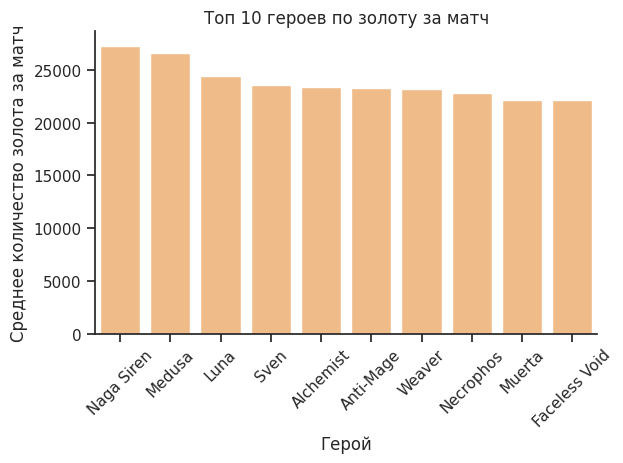

In [ ]:
# Построение графика с использованием выбранной цветовой схемы
sns.barplot(x='localized_name', y='gold_match', data=players_gold_per_min, color='#ffbb78')
# Настройка осей и заголовков
plt.xlabel('Герой')
plt.ylabel('Среднее количество золота за матч')
plt.title('Топ 10 героев по золоту за матч')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Есть ли разница в количестве золота нафармленного героем в разрезе победа / поражение?

Разделим данные по признаку победы

In [ ]:
play_match_hero_win = play_match_hero[play_match_hero['win'] == 1]
play_match_hero_lose = play_match_hero[play_match_hero['win'] == 0]

И рассчитаем для каждого признака победы среднее количество золота, которые фармят герои за игру

In [ ]:
# Группировка по hero_id и win, затем расчет среднего значения gold_match
players_gold_per_min_win = play_match_hero_win.groupby(['hero_id', 'localized_name'])['gold_match'].mean().reset_index().sort_values(by='gold_match', ascending=False).round(2).head(10)
players_gold_per_min_lose = play_match_hero_lose.groupby(['hero_id', 'localized_name'])['gold_match'].mean().reset_index().sort_values(by='gold_match', ascending=False).round(2).head(10)


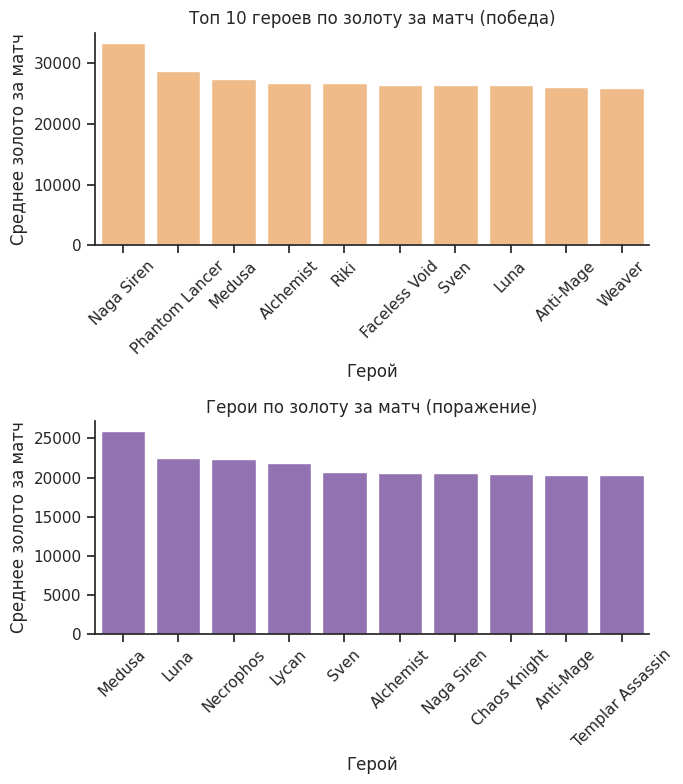

In [ ]:
# Создание фигуры и осей для графиков
fig, ax = plt.subplots(2, 1, figsize=(7, 8))

# Построение графика для победителей
sns.barplot(x='localized_name', y='gold_match', data=players_gold_per_min_win, color='#ffbb78', ax=ax[0])
ax[0].set_title('Топ 10 героев по золоту за матч (победа)')
ax[0].set_xlabel('Герой')
ax[0].set_ylabel('Среднее золото за матч')
ax[0].tick_params(axis='x', rotation=45)

# Построение графика для проигравших
sns.barplot(x='localized_name', y='gold_match', data=players_gold_per_min_lose, color='#9467bd', ax=ax[1])
ax[1].set_title('Герои по золоту за матч (поражение)')
ax[1].set_xlabel('Герой')
ax[1].set_ylabel('Среднее золото за матч')
ax[1].tick_params(axis='x', rotation=45)
# Настройка расстояния между графиками
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.show()


Выведем топ-10 героев по количеству золота за игру при победе

In [ ]:
players_gold_per_min_win

,hero_id,localized_name,gold_match
87,89,Naga Siren,33396.59
11,12,Phantom Lancer,28678.33
92,94,Medusa,27433.17
71,73,Alchemist,26810.52
30,32,Riki,26785.43
39,41,Faceless Void,26470.74
17,18,Sven,26391.22
46,48,Luna,26339.40
0,1,Anti-Mage,26155.39
61,63,Weaver,25959.68


И количество золота героев при поражении

In [ ]:
players_gold_per_min_lose

,hero_id,localized_name,gold_match
92,94,Medusa,25922.80
46,48,Luna,22451.43
34,36,Necrophos,22338.45
75,77,Lycan,21844.38
17,18,Sven,20681.32
71,73,Alchemist,20554.95
87,89,Naga Siren,20535.48
79,81,Chaos Knight,20394.41
0,1,Anti-Mage,20385.86
44,46,Templar Assassin,20271.67


Объединим эти данные, чтобы в таблицу попали только герои из топа-10 по золоту при победе

In [ ]:
# Объединение данных по hero_id, сохраняя только те строки, которые присутствуют в обеих таблицах
players_gold_per_min_lose = play_match_hero_lose.groupby(['hero_id', 'localized_name'])['gold_match'].mean().reset_index().sort_values(by='gold_match', ascending=False).round(2)
merged_data = pd.merge(players_gold_per_min_win, players_gold_per_min_lose, on='hero_id', suffixes=('_win', '_lose'))

# Вывод результата
merged_data

,hero_id,localized_name_win,gold_match_win,localized_name_lose,gold_match_lose
0,89,Naga Siren,33396.59,Naga Siren,20535.48
1,12,Phantom Lancer,28678.33,Phantom Lancer,17498.69
2,94,Medusa,27433.17,Medusa,25922.80
3,73,Alchemist,26810.52,Alchemist,20554.95
4,32,Riki,26785.43,Riki,12467.62
5,41,Faceless Void,26470.74,Faceless Void,18208.97
6,18,Sven,26391.22,Sven,20681.32
7,48,Luna,26339.40,Luna,22451.43
8,1,Anti-Mage,26155.39,Anti-Mage,20385.86
9,63,Weaver,25959.68,Weaver,19732.28


И визуализируем

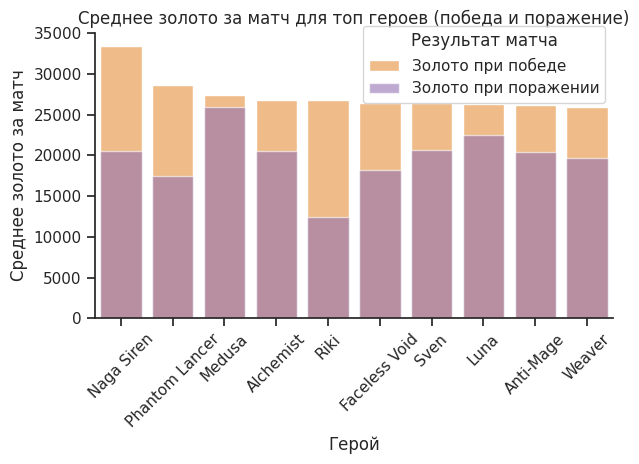

In [ ]:
sns.barplot(x='localized_name_win', y='gold_match_win', data=merged_data, color='#ffbb78', label='Золото при победе')
sns.barplot(x='localized_name_win', y='gold_match_lose', data=merged_data, color='#9467bd', alpha=0.6, label='Золото при поражении')

plt.xlabel('Герой')
plt.ylabel('Среднее золото за матч')
plt.title('Среднее золото за матч для топ героев (победа и поражение)')
plt.xticks(rotation=45)
plt.legend(title='Результат матча', bbox_to_anchor=(1.00, 1.05))
plt.tight_layout()
plt.show()


На графике видно, что при в победных матчах герои фармят больше золота, чем при проигрышных.

##Какие герои получают больше всего опыта за игру

In [ ]:
# Запишем в новый столбец количества опыта за матч
play_match_hero['xp_per_min_match'] = play_match_hero['xp_per_min']*play_match_hero['duration']
play_match_hero_win['xp_per_min_match'] = play_match_hero['xp_per_min']*play_match_hero['duration']
play_match_hero_lose['xp_per_min_match'] = play_match_hero['xp_per_min']*play_match_hero['duration']

Выведем топ-10 героев по среднему опыту за все матчи

In [ ]:
players_xp_per_min = play_match_hero.groupby(['hero_id', 'localized_name'])['xp_per_min_match'].mean().reset_index().sort_values(by='xp_per_min_match', ascending=False).round(2).head(10)
players_xp_per_min

,hero_id,localized_name,xp_per_min_match
0,1,Anti-Mage,31252.19
34,36,Necrophos,30934.25
61,63,Weaver,30326.79
17,18,Sven,30273.03
92,94,Medusa,30160.14
46,48,Luna,29240.29
39,41,Faceless Void,29105.95
68,70,Ursa,28979.16
23,25,Lina,28465.40
76,78,Brewmaster,27894.10


Посмотрим как отличается опыт героев при победе и поражении в матчах

In [ ]:
# Группировка по hero_id и win, затем расчет среднего значения xp_per_min_match
players_xp_per_min_win = play_match_hero_win.groupby(['hero_id', 'localized_name'])['xp_per_min_match'].mean().reset_index().sort_values(by='xp_per_min_match', ascending=False).round(2).head(10)
players_xp_per_min_lose = play_match_hero_lose.groupby(['hero_id', 'localized_name'])['xp_per_min_match'].mean().reset_index().sort_values(by='xp_per_min_match', ascending=False).round(2)


In [ ]:
# Объединение данных по hero_id, сохраняя только те строки, которые присутствуют в обеих таблицах
merged_data_xp_per_min = pd.merge(players_xp_per_min_win, players_xp_per_min_lose, on='hero_id', suffixes=('_win', '_lose'))
merged_data_xp_per_min

,hero_id,localized_name_win,xp_per_min_match_win,localized_name_lose,xp_per_min_match_lose
0,32,Riki,42644.29,Riki,16142.23
1,34,Tinker,36869.50,Tinker,16663.93
2,1,Anti-Mage,35750.00,Anti-Mage,26875.95
3,41,Faceless Void,35415.36,Faceless Void,23297.29
4,63,Weaver,34422.73,Weaver,25222.62
5,18,Sven,34157.51,Sven,26331.43
6,12,Phantom Lancer,33483.67,Phantom Lancer,20197.38
7,25,Lina,32816.37,Lina,24496.11
8,67,Spectre,32418.82,Spectre,18834.44
9,94,Medusa,32012.86,Medusa,28533.37


и визуализируем

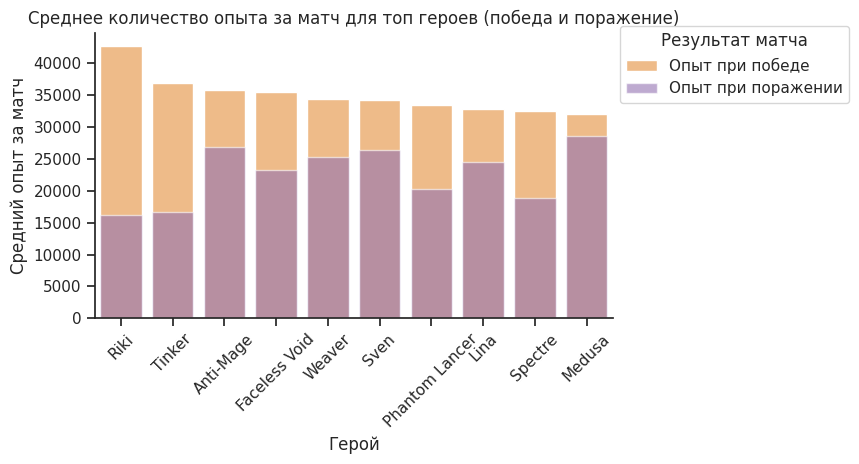

In [ ]:
sns.barplot(x='localized_name_win', y='xp_per_min_match_win', data=merged_data_xp_per_min,
            color='#ffbb78', label='Опыт при победе')
sns.barplot(x='localized_name_win', y='xp_per_min_match_lose', data=merged_data_xp_per_min,
            color='#9467bd', alpha=0.6, label='Опыт при поражении')
plt.xlabel('Герой')
plt.ylabel('Средний опыт за матч')
plt.title('Среднее количество опыта за матч для топ героев (победа и поражение)')
plt.xticks(rotation=45)
plt.legend(title='Результат матча', bbox_to_anchor=(1.00, 1.05))
plt.tight_layout()
plt.show()

Все герои в среднем получают значительно больше опыта в минуту в победных матчах по сравнению с поражениями.
Наиболее значительные различия:
* Riki имеет одно из самых больших различий: 42644 xp/min при победе против 16142 xp/min при поражении.
* Tinker также демонстрирует большое различие: 36869 xp/min при победе против 16663 xp/min при поражении.
* Anti-Mage зарабатывает больше опыта в минуту в победных матчах (35750 xp/min) по сравнению с поражениями (26876 xp/min), но разница здесь меньше, чем у других героев.

Герои с наименьшими различиями:
* Medusa демонстрирует наименьший разрыв в опыте: 32013 xp/min при победе против 28533 xp/min при поражении.
* Sven также имеет относительно небольшой разрыв по сравнению с другими: 34157 xp/min при победе и 26331 xp/min при поражении.

Герои зарабатывают значительно больше опыта в победных матчах, что связано с лучшими возможностями для накопления ресурсов и доминированием в игре. Разница в опыте особенно заметна у таких героев, как Riki, Tinker, и Anti-Mage, которые при победе получают значительно больше опыта по сравнению с поражениями.

## Какие фракции чаще побеждают: свет или тьма?

In [ ]:
team_win = play_match.groupby(['isRadiant'])['win'].mean()
team_win

,win
isRadiant,
False,0.49
True,0.51


Среднее значение побед почти одинаковое, значит победа не зависит от фракции.

## Каких героев чаще всего выбирают?

In [ ]:
# Подсчет общего количества матчей для каждого героя
hero_match_counts = play_match_hero['localized_name'].value_counts()

# Подсчет количества побед для каждого героя
hero_win_counts = play_match_hero[play_match_hero['win'] == 1]['localized_name'].value_counts()

# Объединение данных и расчет процента побед
hero_win_rate = (hero_win_counts / hero_match_counts * 100).round(2)

# Отбор топ-10 самых популярных героев
top_heroes = hero_match_counts.head(10)

# Соединение данных для топ-героев
top_heroes_win_rate = pd.DataFrame({
    'Количество матчей': top_heroes,
    'Процент побед': hero_win_rate[top_heroes.index]

}).fillna(0).round(2)
print(top_heroes_win_rate)

                Количество матчей  Процент побед
localized_name                                  
Rubick                        505          49.31
Luna                          452          49.78
Tiny                          432          47.69
Crystal Maiden                421          51.54
Disruptor                     411          51.34
Hoodwink                      368          55.43
Zeus                          363          51.52
Windranger                    355          52.11
Gyrocopter                    325          50.77
Timbersaw                     323          47.37


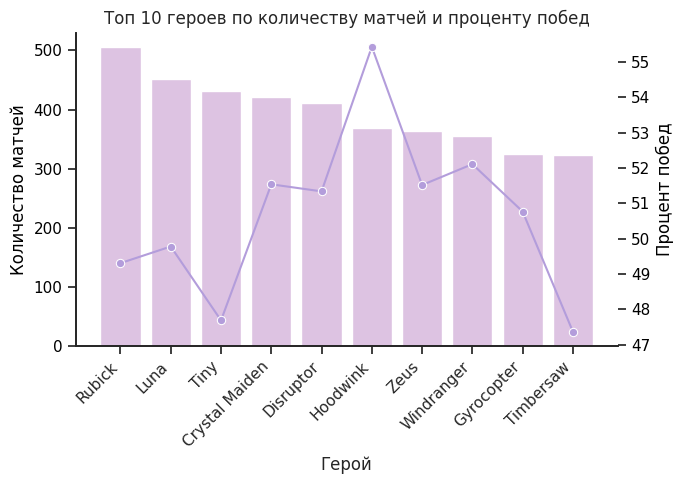

In [ ]:
fig, ax1 = plt.subplots(figsize=(7, 5))
color = '#E1BEE7'
ax1.set_xlabel('Герой')
ax1.set_ylabel('Количество матчей', color='black')
sns.barplot(x=top_heroes_win_rate.index, y='Количество матчей', data=top_heroes_win_rate, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
color = '#B39DDB'
ax2.set_ylabel('Процент побед', color='black')
sns.lineplot(x=top_heroes_win_rate.index, y='Процент побед', data=top_heroes_win_rate, ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Топ 10 героев по количеству матчей и проценту побед')
plt.tight_layout()
plt.show()

Наиболее популярные герои:

* Rubick возглавляет список с 505 матчами, но его процент побед ниже 50% (49.31%), что указывает на частые выборы, но не всегда успешные игры.
* Luna занимает второе место с 452 матчами и процентом побед 49.78%, что также чуть ниже 50%.

Наиболее успешные герои:
* Hoodwink выделяется среди остальных героев с наивысшим процентом побед в списке — 55.43%, несмотря на 368 матчей, что меньше по сравнению с лидерами по количеству игр.
* Windranger также имеет высокий процент побед — 52.11% при 355 матчах.
Герои с низким процентом побед:
* Tiny и Timbersaw имеют один из самых низких процентов побед — 47.69% и 47.37% соответственно, что указывает на то, что они чаще проигрывают, несмотря на популярность.

Герои, такие как Rubick и Luna, популярны, но их процент побед ниже 50%. Напротив, герои, как Hoodwink и Windranger, имеют более высокую успешность, что может говорить о большей эффективности их выбора. Герои с низким процентом побед, как Tiny и Timbersaw, возможно, требуют лучшего мастерства для успешной игры.









## Какие герои чаще всего выигрывают?

In [ ]:
# Создаем DataFrame с количеством матчей и процентом побед
heroes_win_rate = pd.DataFrame({
    'Количество матчей': hero_match_counts,
    'Количество побед': hero_win_counts,
    'Процент побед': hero_win_rate
}).fillna(0).round(2)

heroes_win_rate_sorted = heroes_win_rate.sort_values(by='Процент побед', ascending=False).head(10)

print(heroes_win_rate_sorted)

                     Количество матчей  Количество побед  Процент побед
localized_name                                                         
Huskar                              77                50          64.94
Chen                                71                43          60.56
Keeper of the Light                190               113          59.47
Elder Titan                         66                39          59.09
Sand King                           34                20          58.82
Oracle                              79                46          58.23
Lycan                               31                18          58.06
Dark Seer                           62                36          58.06
Wraith King                         37                21          56.76
Venomancer                         127                72          56.69


и визуализируем

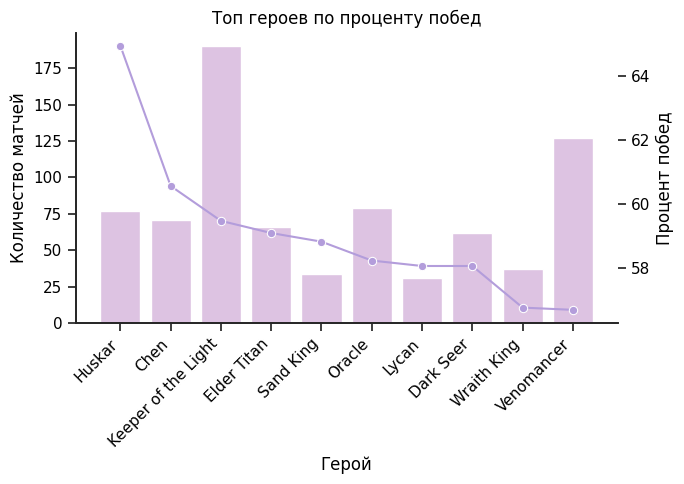

In [ ]:
fig, ax1 = plt.subplots(figsize=(7, 5))
color = '#E1BEE7'
ax1.set_xlabel('Герой', color='black')
ax1.set_ylabel('Количество матчей', color='black')
sns.barplot(x=heroes_win_rate_sorted.index, y='Количество матчей', data=heroes_win_rate_sorted, ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', color='black')

ax2 = ax1.twinx()
color = '#B39DDB'
ax2.set_ylabel('Процент побед', color='black')
sns.lineplot(x=heroes_win_rate_sorted.index, y='Процент побед', data=heroes_win_rate_sorted, ax=ax2, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Топ героев по проценту побед', color='black')
plt.tight_layout()
plt.show()

* Huskar лидирует с впечатляющим процентом побед 64.94% при 77 матчах, что говорит о его высокой эффективности.
* Chen также демонстрирует высокий процент побед — 60.56% при 71 матчах, что указывает на его успешность в играх.
* Keeper of the Light имеет не только высокий процент побед — 59.47%, но и одно из самых высоких количеств матчей (190), что делает его стабильным выбором.

Другие успешные герои:
* Elder Titan, Oracle, Lycan, и Dark Seer также показывают высокие проценты побед в диапазоне от 58% до 59%, при этом играя относительно меньшее количество матчей (31-79 игр).
* Venomancer с 56.69% побед и 127 матчами стабильно выигрывает, что делает его популярным и успешным выбором.

## Какие герои совершают больше всего убийств?

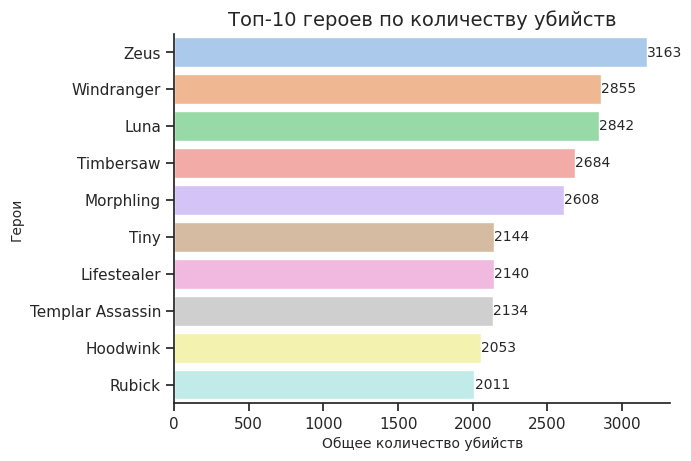

In [ ]:
top_kills = play_match_hero.groupby('localized_name')['kills'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x=top_kills.values, y=top_kills.index,  hue=top_kills.index, palette='pastel')
for i, value in enumerate(top_kills.values):
    ax.text(value + 0.5, i, f'{int(value)}', va='center', ha='left', fontsize=10)
plt.title('Топ-10 героев по количеству убийств', fontsize=14)
plt.xlabel('Общее количество убийств', fontsize=10)
plt.ylabel('Герои', fontsize=10)
plt.show()

## Какие герои совершают больше всего ассистов?

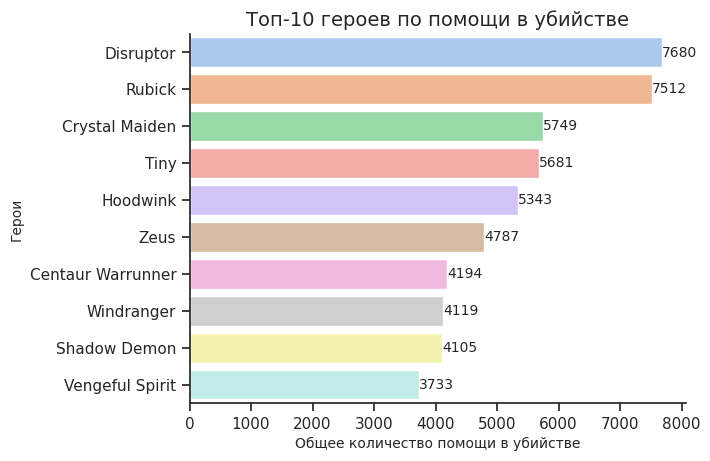

In [ ]:
top_assists = play_match_hero.groupby('localized_name')['assists'].sum().sort_values(ascending=False).head(10)
ax = sns.barplot(x=top_assists.values, y=top_assists.index,  hue=top_assists.index, palette='pastel')
for i, value in enumerate(top_assists.values):
    ax.text(value + 0.5, i, f'{int(value)}', va='center', ha='left', fontsize=10)
plt.title('Топ-10 героев по помощи в убийстве', fontsize=14)
plt.xlabel('Общее количество помощи в убийстве', fontsize=10)
plt.ylabel('Герои', fontsize=10)
plt.show()

## Какой герой меньше всего умирает

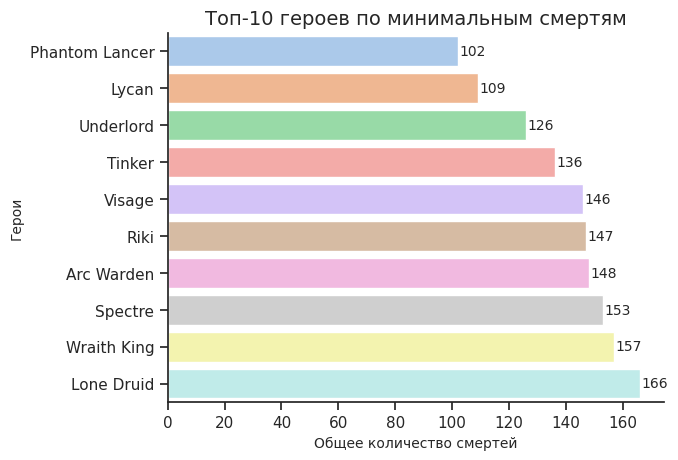

In [ ]:
min_deaths = play_match_hero.groupby('localized_name')['deaths'].sum().sort_values(ascending=True).head(10)
ax = sns.barplot(x=min_deaths.values, y=min_deaths.index, hue=min_deaths.index, palette='pastel')
for i, value in enumerate(min_deaths.values):
    ax.text(value + 0.5, i, f'{int(value)}', va='center', ha='left', fontsize=10)
plt.title('Топ-10 героев по минимальным смертям', fontsize=14)
plt.xlabel('Общее количество смертей', fontsize=10)
plt.ylabel('Герои', fontsize=10)
plt.show()

Общий вывод:

* Zeus проявляет отличные навыки в убийствах, что может указывать на его активное участие в агрессивной игре.
* Disruptor и Rubick являются ключевыми героями для команды, обеспечивая высокое количество ассистов, что свидетельствует о их важной роли в командной поддержке.
* Phantom Lancer выделяется как герой с низким уровнем смертности, что может говорить о его способности эффективно избегать опасности и поддерживать свою выживаемость в матчах.

## Сколько в среднем длится матч?

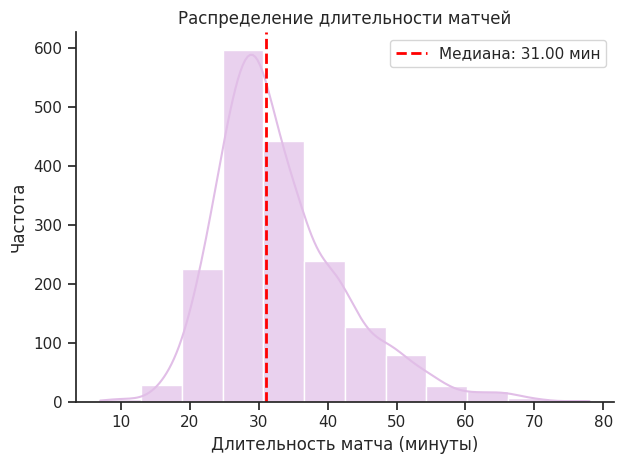

In [ ]:
# Вычисление среднего значения длительности матчей
mean_duration = matches['duration'].median()
# Построение гистограммы длительности матчей
sns.histplot(matches['duration'], kde=True, bins=12, color='#E1BEE7',alpha=0.7)
plt.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Медиана: {mean_duration:.2f} мин')
plt.title('Распределение длительности матчей')
plt.xlabel('Длительность матча (минуты)')
plt.ylabel('Частота')
plt.legend()
plt.tight_layout()
plt.show()

Средняя длительность матча 31 минута.

## Найдем среднее время до первой крови

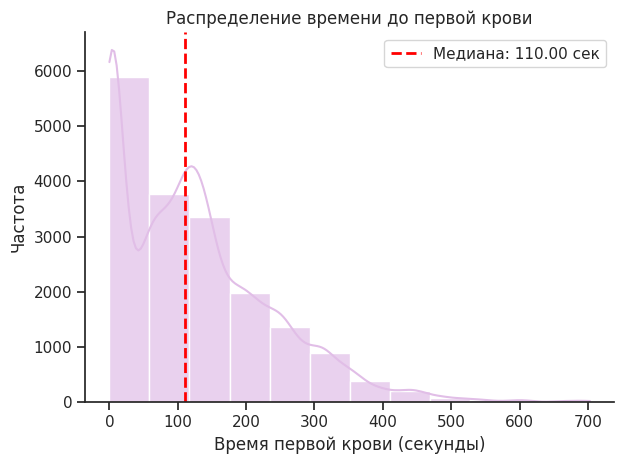

In [ ]:
# Вычисление среднего значения времени до первой урови
mean_first_blood = play_match_hero['first_blood_time'].median()

sns.histplot(play_match_hero['first_blood_time'], kde=True, bins=12, color='#E1BEE7',alpha=0.7)
plt.axvline(mean_first_blood, color='red', linestyle='--', linewidth=2, label=f'Медиана: {mean_first_blood:.2f} сек')
plt.title('Распределение времени до первой крови')
plt.xlabel('Время первой крови (секунды)')
plt.ylabel('Частота')
plt.legend()
plt.tight_layout()
plt.show()

Медианное значение времени до первой крови - 110 секунд.

## Найдем 10 топовых игроков по проценту побед

Мы не хотим, чтобы в топ попали игроки, которые сыграли, например, 1 матч и его выиграли. Поэтому сначала посмотрим на распределение игроков по количеству матчей

In [ ]:
# Подсчёт количества матчей, сыгранных каждым игроком
player_match_cnt = play_match.groupby('steam_id')['match_id'].agg('count')
# Определение моды
mode_value = player_match_cnt.mode()[0]
mode_value

2

Чаще всего игроки сыграли всего по 2 матча

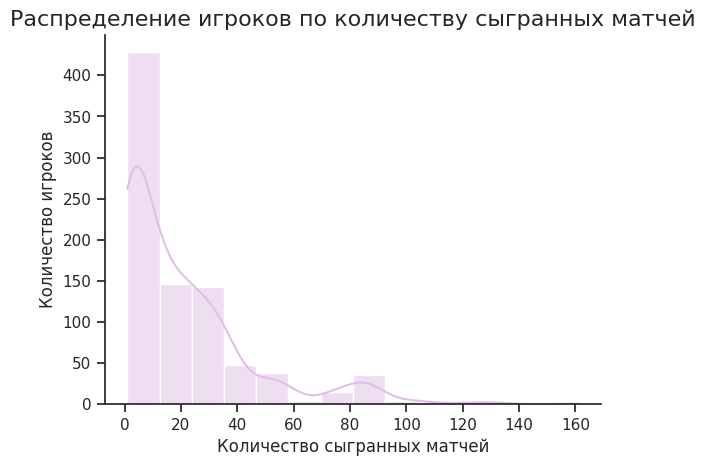

In [ ]:
# Создание гистограммы с линией плотности
sns.histplot(player_match_cnt, bins=14, kde=True, color='#E1BEE7')

# Настройка графика
plt.title('Распределение игроков по количеству сыгранных матчей', fontsize=16)
plt.xlabel('Количество сыгранных матчей', fontsize=12)
plt.ylabel('Количество игроков', fontsize=12)
plt.show()

Для вывода топа игроков по проценту побед возмем планку от 20 игр

In [ ]:
# Группировка по игрокам (steam_id) и подсчёт побед и общего количества матчей
player_stats = play_match.groupby('steam_id').agg(total_matches = ('win', 'count'),
                                                  wins=('win', 'sum'))

# Фильтрация игроков, у которых сыграно менее 20 матчей
player_stats = player_stats[player_stats['total_matches'] >= 20]

# Вычисление процента побед
player_stats['win_rate'] = ((player_stats['wins'] / player_stats['total_matches']) * 100).round(2)
player_stats = player_stats.sort_values(by='win_rate', ascending=False)
player_wins_stats = player_stats.head(20)
player_wins_stats

,total_matches,wins,win_rate
steam_id,,,
118948666,25,21,84.00
425588742,25,21,84.00
349310876,25,21,84.00
138177198,25,21,84.00
1031547092,25,21,84.00
957204049,21,17,80.95
835864135,21,17,80.95
919735867,21,17,80.95
185590374,21,17,80.95


## Отличаются ли статы в их матчах от матчей, где их нет?


In [ ]:
# Получаем список steam_id из топ-20 игроков
top_20_steam_ids = player_wins_stats.index.tolist()

In [ ]:
# Данные матчей для игроков из топ-20
top_20_matches = play_match[play_match['steam_id'].isin(top_20_steam_ids)]

# Данные матчей для остальных игроков
other_matches = play_match[~play_match['steam_id'].isin(top_20_steam_ids)]

In [ ]:
# Функция для подсчета статистики
def calculate_stats(df):
    return df.agg({
        'win': 'mean',
        'kills': 'mean',
        'assists': 'mean',
        'deaths': 'mean',
        'gold_per_min': 'mean',
        'xp_per_min': 'mean',
        'hero_damage_per_min': 'mean',
        'hero_healing_per_min': 'mean',
        'tower_damage_per_min': 'mean'
    })

# Статистика для матчей топ-20 игроков
top_20_stats = calculate_stats(top_20_matches)

# Статистика для матчей других игроков
other_stats = calculate_stats(other_matches)

print("Средняя статистика для матчей топ-20 игроков:")
print(top_20_stats)

print("\nСредняя статистика для матчей других игроков:")
print(other_stats)

Средняя статистика для матчей топ-20 игроков:
win                      0.75
kills                    7.03
assists                 14.81
deaths                   5.51
gold_per_min           534.98
xp_per_min             709.47
hero_damage_per_min    608.11
hero_healing_per_min    22.99
tower_damage_per_min   102.74
dtype: float64

Средняя статистика для матчей других игроков:
win                      0.48
kills                    5.80
assists                 11.82
deaths                   6.02
gold_per_min           490.44
xp_per_min             635.86
hero_damage_per_min    563.07
hero_healing_per_min    25.72
tower_damage_per_min    70.21
dtype: float64


In [ ]:
# Рассчитываем процентные различия
stats_diff = ((top_20_stats - other_stats) / other_stats * 100).round(2)

print("\nПроцентное различие между статистиками топ-20 игроков и других игроков:")
print(stats_diff)


Процентное различие между статистиками топ-20 игроков и других игроков:
win                     53.95
kills                   21.22
assists                 25.34
deaths                  -8.53
gold_per_min             9.08
xp_per_min              11.58
hero_damage_per_min      8.00
hero_healing_per_min   -10.59
tower_damage_per_min    46.33
dtype: float64


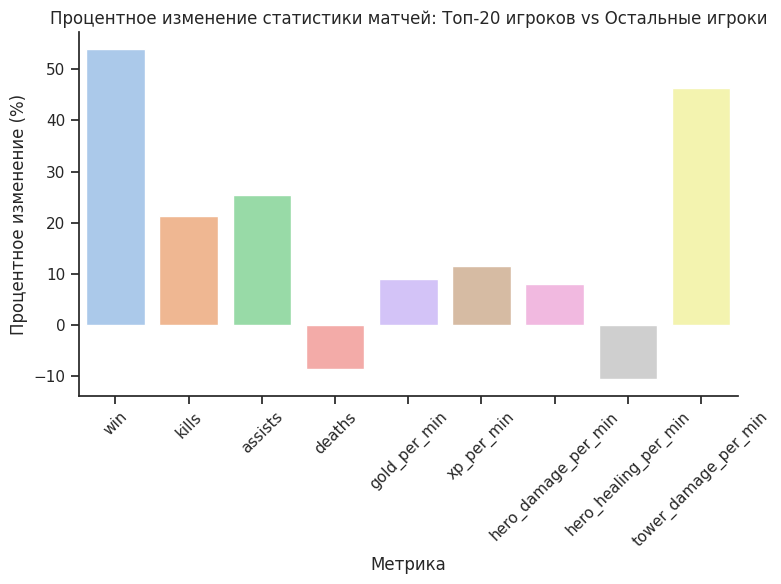

In [ ]:
# Создаем DataFrame для визуализации
stats_diff_df = pd.DataFrame({
    'Metric': stats_diff.index,
    'Percentage Change': stats_diff.values
})
plt.figure(figsize=(8, 6))
# Построение графика
sns.barplot(x='Metric', y='Percentage Change', data=stats_diff_df, palette='pastel', hue='Metric', dodge=False)
plt.xticks(rotation=45)
plt.title('Процентное изменение статистики матчей: Топ-20 игроков vs Остальные игроки')
plt.xlabel('Метрика')
plt.ylabel('Процентное изменение (%)')
plt.tight_layout()
plt.show()

* Топ-20 игроков выигрывают 75% своих матчей, в то время как остальные игроки выигрывают только 48% матчей. Это подтверждает более высокий уровень игры топ-20.
* Убийства и ассисты: Топ-20 игроки совершают в среднем больше убийств (7.03 против 5.80) и ассистов (14.81 против 11.82), что свидетельствует об их большей вовлеченности в активные боевые действия и командную работу.
* Смерти: Топ-20 игроки умирают немного реже (5.51 против 6.02), что также говорит о более высокой эффективности и осторожности.
* Экономика (gold_per_min, xp_per_min): У топ-20 игроков средний заработок золота и опыта в минуту выше: gold_per_min — 534.98 против 490.44, xp_per_min — 709.47 против 635.86. Это говорит о лучшей эффективности в игре и накоплении ресурсов.
* Наносимый урон: Топ-20 игроки наносят больше урона героям за минуту (608.11 против 563.07), что указывает на их более агрессивную и успешную игру.
* Урон по башням: Урон по башням у топ-20 игроков также выше (102.74 против 70.21), что говорит о большем влиянии на завершение игры через уничтожение инфраструктуры врага.

Общий вывод:
Топ-20 игроки демонстрируют значительно лучшие показатели во всех ключевых аспектах игры — от боевых действий и выживаемости до накопления ресурсов и влияния на исход матча.

## Влияет ли средний процент побед игроков в команде на победу команды?

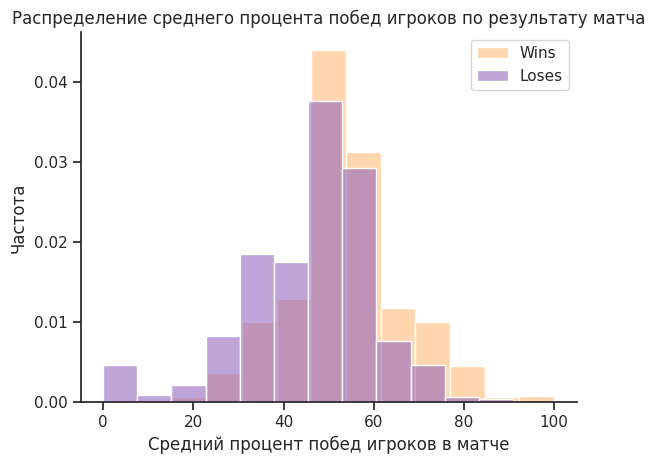

In [ ]:
# Группировка по игрокам и подсчет побед и общего количества матчей
player_match_stats = play_match.groupby('steam_id').agg(
    total_matches=('win', 'count'),
    wins=('win', 'sum')
)

# Вычисление процента побед
player_match_stats['win_rate'] = ((player_match_stats['wins'] / player_match_stats['total_matches']) * 100).round(2)

# Объединение данных обратно в play_match, чтобы добавить столбец win_rate
play_match = play_match.merge(
    player_match_stats[['win_rate']],
    on='steam_id',
    how='left'
)

#  Разделение на выигранные и проигранные матчи
final_wins = play_match[play_match['win'] == 1]
final_loses = play_match[play_match['win'] == 0]

sns.histplot(final_wins['win_rate'], bins=12, stat='density', kde=False, label='Wins', color='#ffbb78', alpha=0.6)
sns.histplot(final_loses['win_rate'], bins=12, stat='density', kde=False, label='Loses', color='#9467bd', alpha=0.6)
plt.xlabel('Средний процент побед игроков в матче')
plt.ylabel('Частота')
plt.title('Распределение среднего процента побед игроков по результату матча')
plt.legend()
plt.show()


На гистограмме видно, что в выигрышных матчах средний чаще встречаются игроки с более высоким процентом побед, значит можно сказать, что средний процент побед игроков в команде влияет на победу команды.

## Какие герои могут повлиять на исход матча (наличие carry в столбце роль) в долгих играх (больше 50 минут).

In [ ]:
# Фильтрация долгих матчей (длительность больше 50 минут)
long_matches = play_match[play_match_hero['duration'] > 50]
# Фильтрация героев, у которых есть роль 'Carry'
carry_heroes = heroes[heroes['roles'].apply(lambda roles: 'Carry' in roles)]['localized_name']
# Преобразование результата в список
carry_heroes_list = carry_heroes.tolist()
carries= play_match_hero[(play_match_hero['localized_name'].isin(carry_heroes)) & (play_match_hero['duration']>50)]

In [ ]:
carry_win_rates = (carries.groupby(['localized_name'])['win'].sum() / carries.groupby(['localized_name'])['win'].count()).sort_values(ascending = False).reset_index().round(2)
# Фильтрация героев, у которых win > 0.5
filtered_carries = carry_win_rates[carry_win_rates['win'] > 0.6]

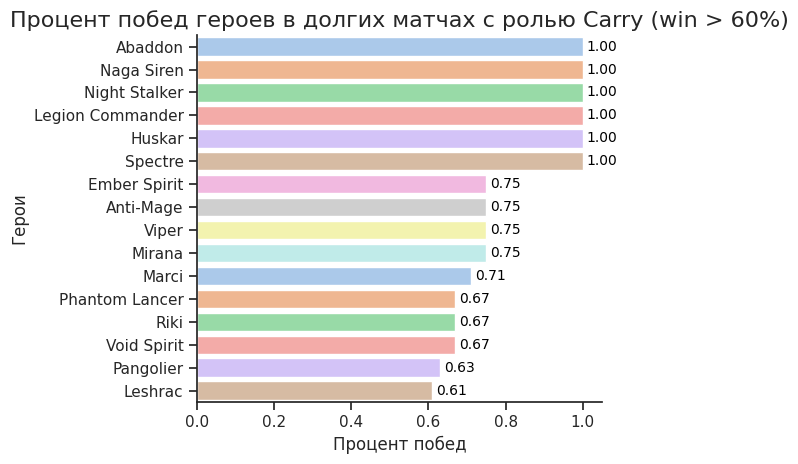

In [ ]:
ax = sns.barplot(x=filtered_carries['win'], y=filtered_carries['localized_name'], hue=filtered_carries['localized_name'], dodge=False, palette='pastel')

for index, value in enumerate(filtered_carries['win']):
    ax.text(value + 0.01, index, f'{value:.2f}', va='center', ha='left', fontsize=10, color='black')
plt.title('Процент побед героев в долгих матчах с ролью Carry (win > 60%)', fontsize=16)
plt.xlabel('Процент побед', fontsize=12)
plt.ylabel('Герои', fontsize=12)
plt.tight_layout()
plt.show()

## Посмотрим на регионы матчей

In [ ]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  22 non-null     int64 
 1   regionid    22 non-null     int64 
 2   0           22 non-null     object
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [ ]:
# Переименуем столбец с названиями регионов в DataFrame regions
regions = regions.rename(columns={'0': 'region_name'})
# Объединяем play_match с regions по столбцам 'region' и 'regionid'
play_match_hero = play_match_hero.merge(
    regions[['regionid', 'region_name']],
    left_on='region',
    right_on='regionid',
    how='left'
)
# Удаляем столбец 'regionid', если больше не нужен
play_match_hero = play_match_hero.drop(columns=['regionid'])

In [ ]:
play_match_hero['region_name'].unique()

array(['EUROPE', 'SINGAPORE', 'STOCKHOLM', 'PW TELECOM GUANGDONG',
       'PW UNICOM', nan, 'US EAST', 'PERU', 'ARGENTINA'], dtype=object)

In [ ]:
# Заменяем nan на 'Регион не определен' в столбце 'region_name'
play_match_hero['region_name'] = play_match_hero['region_name'].fillna('Регион не определен')

print(play_match_hero['region_name'].unique())

['EUROPE' 'SINGAPORE' 'STOCKHOLM' 'PW TELECOM GUANGDONG' 'PW UNICOM'
 'Регион не определен' 'US EAST' 'PERU' 'ARGENTINA']


In [ ]:
play_match_region = play_match_hero.groupby('region_name').agg({'match_id': 'count'}).reset_index()
top_5_regions = play_match_region.sort_values(by = 'match_id', ascending=False).head()

In [ ]:
top_5_regions

,region_name,match_id
1,EUROPE,11550
6,STOCKHOLM,3110
5,SINGAPORE,2170
7,US EAST,370
2,PERU,280


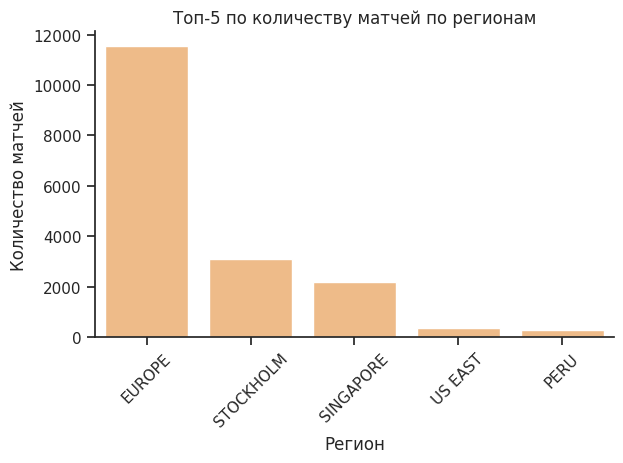

In [ ]:
sns.barplot(x='region_name', y='match_id', data=top_5_regions, color='#ffbb78')
plt.xlabel('Регион')
plt.ylabel('Количество матчей')
plt.title('Топ-5 по количеству матчей по регионам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3. Статистический анализ, проверка гипотез

### Проверим гипозету о наличии отличий в параметрах игроков (убийства, ассисты, опыт, золото) у победивших и проигравших команд.


In [ ]:
# 1. Разделение данных на победившие и проигравшие команды
winners = play_match[play_match['win'] == 1]
losers = play_match[play_match['win'] == 0]

Проверим распреледения данных

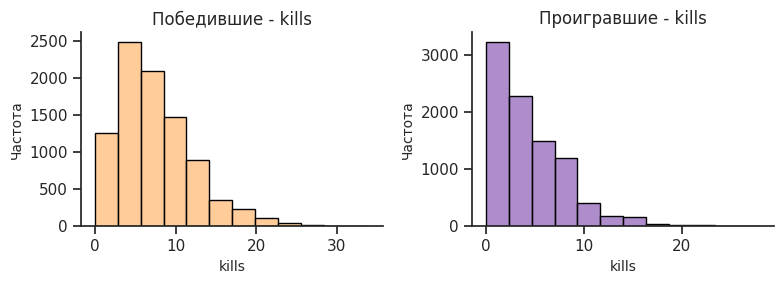


Параметр: kills
Нормальность (победившие): p-value = 0.00000
Нормальность (проигравшие): p-value = 0.00000
Распределение для победивших не является нормальным.
Распределение для проигравших не является нормальным.

Дисперсия для победивших: 23.25
Дисперсия для проигравших: 13.08


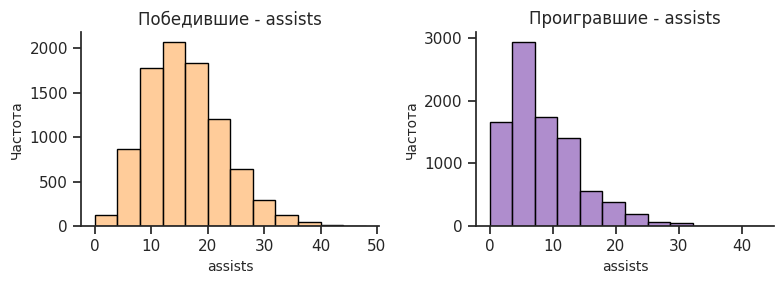


Параметр: assists
Нормальность (победившие): p-value = 0.00000
Нормальность (проигравшие): p-value = 0.00000
Распределение для победивших не является нормальным.
Распределение для проигравших не является нормальным.

Дисперсия для победивших: 46.36
Дисперсия для проигравших: 33.48


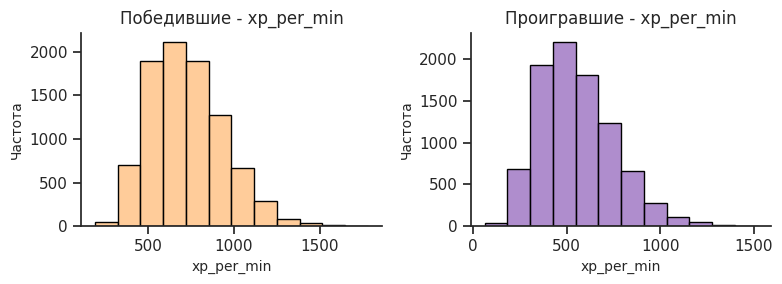


Параметр: xp_per_min
Нормальность (победившие): p-value = 0.00000
Нормальность (проигравшие): p-value = 0.00000
Распределение для победивших не является нормальным.
Распределение для проигравших не является нормальным.

Дисперсия для победивших: 45244.52
Дисперсия для проигравших: 39646.38


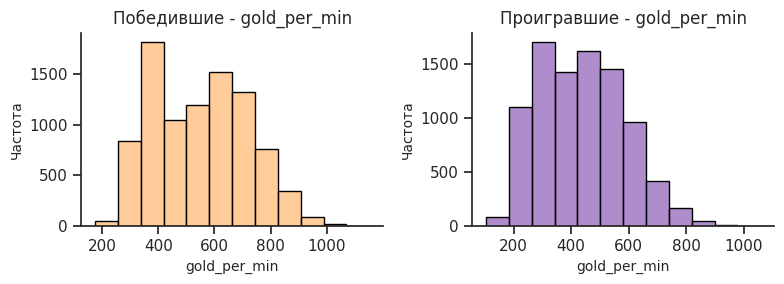


Параметр: gold_per_min
Нормальность (победившие): p-value = 0.00000
Нормальность (проигравшие): p-value = 0.00000
Распределение для победивших не является нормальным.
Распределение для проигравших не является нормальным.

Дисперсия для победивших: 28030.39
Дисперсия для проигравших: 21834.64


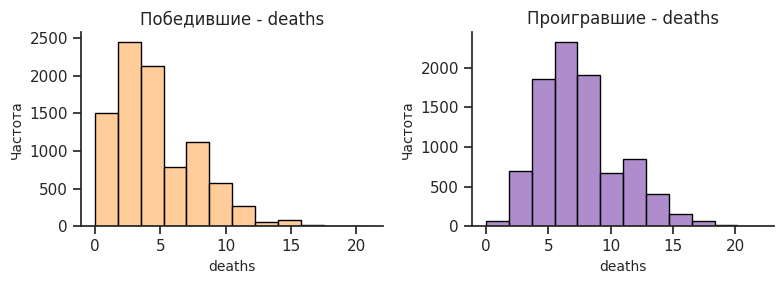


Параметр: deaths
Нормальность (победившие): p-value = 0.00000
Нормальность (проигравшие): p-value = 0.00000
Распределение для победивших не является нормальным.
Распределение для проигравших не является нормальным.

Дисперсия для победивших: 9.92
Дисперсия для проигравших: 10.05


In [ ]:
# Функция для проверки нормальности распределения и визуализации
def check_normality_and_variance(play_match, param):
    winners_param = play_match[play_match['win'] == 1][param]
    losers_param = play_match[play_match['win'] == 0][param]
    # Построение гистограмм
    plt.figure(figsize=(8, 3))
    # Гистограмма для победивших
    plt.subplot(1, 2, 1)
    sns.histplot(winners_param, kde=False, color='#ffbb78', edgecolor='black', bins=12)
    plt.title(f'Победившие - {param}', fontsize=12)
    plt.xlabel(param, fontsize=10)
    plt.ylabel('Частота', fontsize=10)
    # Гистограмма для проигравших
    plt.subplot(1, 2, 2)
    sns.histplot(losers_param, kde=False, color='#9467bd', edgecolor='black', bins=12)
    plt.title(f'Проигравшие - {param}', fontsize=12)
    plt.xlabel(param, fontsize=10)
    plt.ylabel('Частота', fontsize=10)
    plt.tight_layout()
    plt.show()
    # Проверка нормальности с использованием теста Шапиро-Уилка
    w_stat_winners, p_value_winners = stats.shapiro(winners_param)
    w_stat_losers, p_value_losers = stats.shapiro(losers_param)

    print(f"\nПараметр: {param}")
    print(f"Нормальность (победившие): p-value = {p_value_winners:.5f}")
    print(f"Нормальность (проигравшие): p-value = {p_value_losers:.5f}")

    if p_value_winners < 0.05:
        print("Распределение для победивших не является нормальным.")
    else:
        print("Распределение для победивших является нормальным.")

    if p_value_losers < 0.05:
        print("Распределение для проигравших не является нормальным.")
    else:
        print("Распределение для проигравших является нормальным.")

    # Вычисление дисперсий выборок
    var_winners = np.var(winners_param, ddof=1)
    var_losers = np.var(losers_param, ddof=1)

    print(f"\nДисперсия для победивших: {var_winners:.2f}")
    print(f"Дисперсия для проигравших: {var_losers:.2f}")

check_normality_and_variance(play_match, 'kills')

check_normality_and_variance(play_match, 'assists')

check_normality_and_variance(play_match, 'xp_per_min')

check_normality_and_variance(play_match, 'gold_per_min')

check_normality_and_variance(play_match, 'deaths')


* Нулевая гипотеза (H0):- Нет отличий в параметрах игроков (убийства, ассисты, опыт, золото) у победивших и проигравших команд
* Альтернативная гипотеза (H1): Есть отличия в параметрах игроков (убийства, ассисты, опыт, золото) у победивших и проигравших команд

Поскольку все параметры (kills, assists, xp_per_min, gold_per_min,deaths ) не имеют нормального распределения (p-value < 0.05), то лучше применить непараметрический тест Манна-Уитни, который подходит для данных, не соответствующих нормальному распределению.

In [ ]:
# Функция для проведения теста Манна-Уитни и проверки гипотезы
def mann_whitney_test(play_match, param):
    winners_param = winners[param]
    losers_param = losers[param]
    # Проведение теста Манна-Уитни
    u_stat, p_value_u = mannwhitneyu(winners_param, losers_param, alternative='two-sided')
    # Вывод результатов
    print(f"\nПараметр: {param}")
    print(f"U-statistic: {u_stat:.4f}")
    print(f"P-value: {p_value_u:.4f}")

    # Проверка статистической значимости
    alpha = 0.05
    if p_value_u < alpha:
        print(f"Разница в {param} между победившими и проигравшими командами статистически значима (Mann-Whitney U test).")
    else:
        print(f"Разница в {param} между победившими и проигравшими командами не является статистически значимой (Mann-Whitney U test).")

mann_whitney_test(play_match, 'kills')

mann_whitney_test(play_match, 'assists')

mann_whitney_test(play_match, 'xp_per_min')

mann_whitney_test(play_match, 'gold_per_min')

mann_whitney_test(play_match, 'deaths')


Параметр: kills
U-statistic: 56593501.0000
P-value: 0.0000
Разница в kills между победившими и проигравшими командами статистически значима (Mann-Whitney U test).

Параметр: assists
U-statistic: 64582162.5000
P-value: 0.0000
Разница в assists между победившими и проигравшими командами статистически значима (Mann-Whitney U test).

Параметр: xp_per_min
U-statistic: 58850448.0000
P-value: 0.0000
Разница в xp_per_min между победившими и проигравшими командами статистически значима (Mann-Whitney U test).

Параметр: gold_per_min
U-statistic: 55944853.5000
P-value: 0.0000
Разница в gold_per_min между победившими и проигравшими командами статистически значима (Mann-Whitney U test).

Параметр: deaths
U-statistic: 19713997.0000
P-value: 0.0000
Разница в deaths между победившими и проигравшими командами статистически значима (Mann-Whitney U test).


### Проверим гипотезу о том, связаны ли количество убийств в минуту и продолжительность матча.

* Нулевая гипотеза (H0): Количество убийств за минуту не связано с продолжительностью матча.
* Альтернативная гипотеза (H1): Количество убийств за минуту связано с продолжительностью матча.

In [ ]:
# Функция для проверки нормальности распределения и вычисления дисперсии для двух столбцов
def check_normality(play_match, param1, param2):
    # Данные для параметров
    data1 = play_match[param1]
    data2 = play_match[param2]

    # Построение гистограмм
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(data1, kde=False, color='#9467bd', edgecolor='black', bins=12)
    plt.title(f'Распределение - {param1}', fontsize=12)
    plt.xlabel(param1, fontsize=10)
    plt.ylabel('Частота', fontsize=10)

    plt.subplot(1, 2, 2)
    sns.histplot(data2, kde=False, color='#ff7f0e', edgecolor='black', bins=12)
    plt.title(f'Распределение - {param2}', fontsize=12)
    plt.xlabel(param2, fontsize=10)
    plt.ylabel('Частота', fontsize=10)

    plt.tight_layout()
    plt.show()

    # Проверка нормальности с использованием теста Шапиро-Уилка
    w_stat1, p_value1 = stats.shapiro(data1)
    w_stat2, p_value2 = stats.shapiro(data2)

    print(f"\nПараметр: {param1}")
    print(f"Нормальность: p-value = {p_value1:.5f}")
    if p_value1 < 0.05:
        print("Распределение не является нормальным.")
    else:
        print("Распределение является нормальным.")

    print(f"\nПараметр: {param2}")
    print(f"Нормальность: p-value = {p_value2:.5f}")
    if p_value2 < 0.05:
        print("Распределение не является нормальным.")
    else:
        print("Распределение является нормальным.")

    # Вычисление дисперсии выборок
    variance1 = np.var(data1, ddof=1)
    variance2 = np.var(data2, ddof=1)

    print(f"\nДисперсия для {param1}: {variance1:.2f}")
    print(f"Дисперсия для {param2}: {variance2:.2f}")

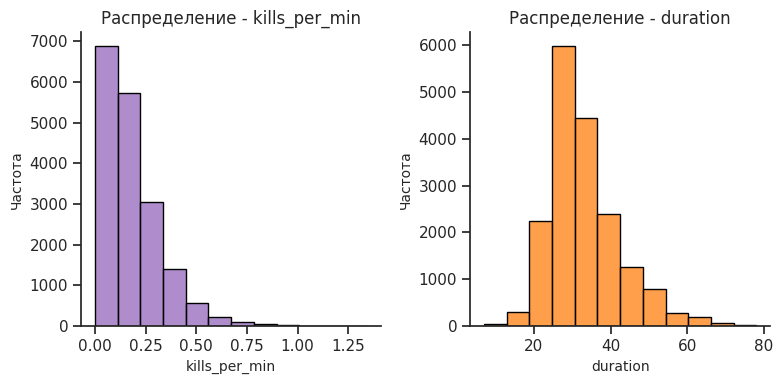


Параметр: kills_per_min
Нормальность: p-value = 0.00000
Распределение не является нормальным.

Параметр: duration
Нормальность: p-value = 0.00000
Распределение не является нормальным.

Дисперсия для kills_per_min: 0.02
Дисперсия для duration: 88.39


In [ ]:
check_normality(play_match, 'kills_per_min', 'duration')

In [ ]:
def spearman_correlation_analysis(data, x_col, y_col):
    # Корреляционный анализ методом Спирмена
    corr, p_value = stats.spearmanr(data[x_col], data[y_col])

    print(f"Корреляция: {corr:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < 0.05:
        print("Корреляция статистически значима.")
    else:
        print("Нет статистически значимой корреляции.")

    # Визуализация
    plt.figure(figsize=(4,4))
    sns.scatterplot(x=data[x_col], y=data[y_col], color='#ffbb78')
    plt.title(f"Влияние {x_col} на {y_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

Корреляция: -0.0903
P-value: 0.0000
Корреляция статистически значима.


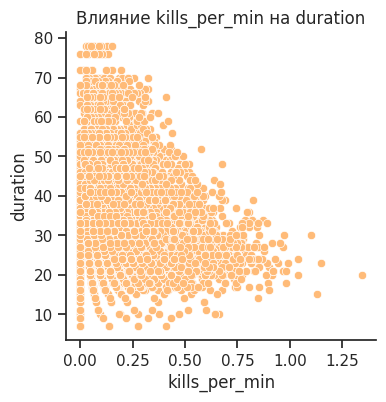

In [ ]:
spearman_correlation_analysis(play_match, 'kills_per_min', 'duration')

### Проверим гипотезу о том, влияет ли время первого убийста на продолжительность матча.

* Нулевая гипотеза (H0): Время до первого убийства не влияет на продолжительность матча.
* Альтернативная гипотеза (H1): Время до первого убийства влияет на продолжительность матча.

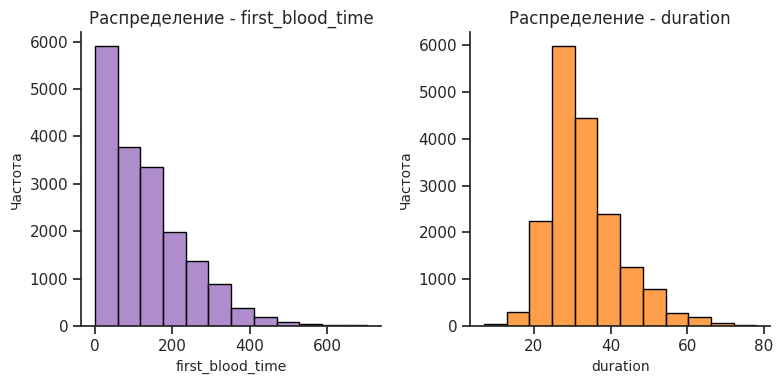


Параметр: first_blood_time
Нормальность: p-value = 0.00000
Распределение не является нормальным.

Параметр: duration
Нормальность: p-value = 0.00000
Распределение не является нормальным.

Дисперсия для first_blood_time: 12863.28
Дисперсия для duration: 88.39


In [ ]:
check_normality(play_match, 'first_blood_time', 'duration')

Корреляция: -0.0080
P-value: 0.2804
Нет статистически значимой корреляции.


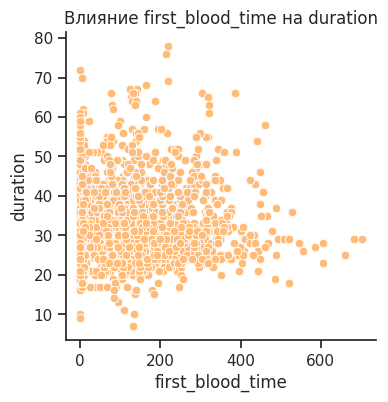

In [ ]:
spearman_correlation_analysis(play_match, 'first_blood_time', 'duration')

### Проверим гипотезу о том, влияет ли количество урона башен в минуту матча на продолжительность матча.

* Нулевая гипотеза (H0): Количество урона башен в минуту матча не влияет на продолжительность матча.
* Альтернативная гипотеза (H1): Количество урона башен в минуту матча влияет на продолжительность матча.

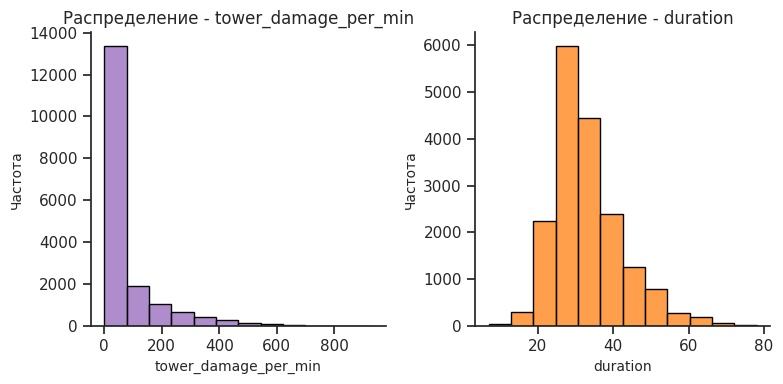


Параметр: tower_damage_per_min
Нормальность: p-value = 0.00000
Распределение не является нормальным.

Параметр: duration
Нормальность: p-value = 0.00000
Распределение не является нормальным.

Дисперсия для tower_damage_per_min: 13875.57
Дисперсия для duration: 88.39


In [ ]:
check_normality(play_match, 'tower_damage_per_min', 'duration')

Корреляция: 0.0578
P-value: 0.0000
Корреляция статистически значима.


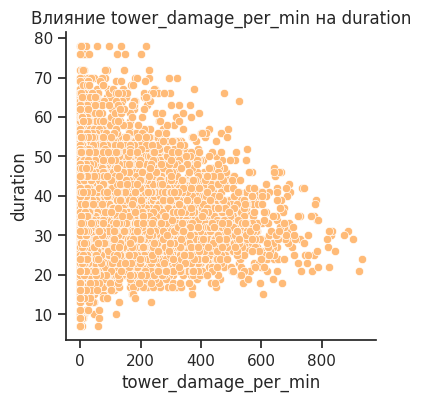

In [ ]:
spearman_correlation_analysis(play_match, 'tower_damage_per_min', 'duration')

Посмотрим на среднюю продолжительность матчей по регионам

In [ ]:
regions_duration = play_match_hero.groupby('region_name').agg({'duration': 'median'}).reset_index()
regions_duration.sort_values(by = 'duration', ascending=False)

,region_name,duration
2,PERU,39.50
3,PW TELECOM GUANGDONG,37.00
8,Регион не определен,35.00
0,ARGENTINA,34.50
4,PW UNICOM,34.00
7,US EAST,34.00
1,EUROPE,31.00
6,STOCKHOLM,31.00
5,SINGAPORE,30.00


### Проверим гипотезу о длительности матчей по регионам.

* Нулевая гипотеза (H0): Длительность матчей не отличается по регионам
* Альтернативная гипотеза (H1): Длительность матчей отличается в зависимости от региона

In [ ]:
# Проверка нормальности для каждого региона
regions = play_match_hero['region_name'].unique()
normality_results = {}

for region in regions:
    region_data = play_match[play_match_hero['region_name'] == region]['duration']
    stat, p_value = stats.shapiro(region_data)
    normality_results[region] = p_value

# Вывод результатов
for region, p_value in normality_results.items():
    print(f"Регион: {region}, P-value для теста Шапиро-Уилка: {p_value:.10f}")


Регион: EUROPE, P-value для теста Шапиро-Уилка: 0.0000000000
Регион: SINGAPORE, P-value для теста Шапиро-Уилка: 0.0000000000
Регион: STOCKHOLM, P-value для теста Шапиро-Уилка: 0.0000000000
Регион: PW TELECOM GUANGDONG, P-value для теста Шапиро-Уилка: 0.0097382413
Регион: PW UNICOM, P-value для теста Шапиро-Уилка: 0.0011172945
Регион: Регион не определен, P-value для теста Шапиро-Уилка: 0.0000001408
Регион: US EAST, P-value для теста Шапиро-Уилка: 0.0000000491
Регион: PERU, P-value для теста Шапиро-Уилка: 0.0000000022
Регион: ARGENTINA, P-value для теста Шапиро-Уилка: 0.0000018532


Для ответа на вопрос используем критерий Краскела-Уоллиса так как будем сравнивать средние значения более, чем в трех выборках.

In [ ]:
# Краскел-Уоллис для сравнения длительности матчей по регионам
h_stat, p_value_kw = stats.kruskal(*(play_match_hero[play_match_hero['region_name'] == region]['duration'] for region in regions))

print(f"Критерий Краскела-Уоллиса: H-statistic = {h_stat:.4f}, P-value = {p_value_kw:.10f}")

if p_value_kw < 0.05:
    print("Длительность матчей статистически значимо отличается по регионам (Краскел-Уоллис).")
else:
    print("Длительность матчей не отличается по регионам (Краскел-Уоллис).")


Критерий Краскела-Уоллиса: H-statistic = 344.6015, P-value = 0.0000000000
Длительность матчей статистически значимо отличается по регионам (Краскел-Уоллис).


## Общий вывод

На этапе предобработки мы ознакомились с данными, в matches в столбце region unknown' заменили на 0 и привели значения к числовому типу, в столбце  duration  перевели значения в минуты. Проверили на пропуски и дубликаты,в players обнаружили пропуски в personaname (124), в heroes в столбце turn_rate (11375) и дубликаты в столбце localized_name, удалили их.

В ходе исследовательского анализа данных выявлены ключевые факторы, которые оказывают значительное влияние на победу в матчах.

1. Командная работа и координация

Показатели ассистов и убийств оказывают наибольшее влияние на исход игры. Команды с большим количеством ассистов (коэффициент корреляции 0.48) демонстрируют более высокий уровень командной игры, что ведет к победе. Это подтверждают такие герои, как Rubick и Disruptor, которые часто оказываются ключевыми в обеспечении поддержки команды благодаря большому числу ассистов.
Убийства также являются важным фактором. Чем больше убийств команда совершает в минуту, тем выше её шансы на победу. Герои, специализирующиеся на убийствах, такие как Zeus, выделяются своими агрессивными стилями игры, что помогает команде доминировать на карте.
2. Экономика

Фарм золота и опыта тесно связан с успехом команды. Чем больше золота и опыта игроки получают в минуту, тем выше вероятность победы. Например, такие герои, как Anti-Mage и Tinker, зарабатывают значительно больше опыта в минуту в победных матчах, что помогает им быстрее получить ключевые способности и предметы для успешного завершения игры.
Победившие команды также демонстрируют более стабильные и высокие показатели накопления ресурсов, особенно в виде золота в минуту, что дает им преимущество по сравнению с проигравшими.
3. Выживаемость и смертность

Количество смертей имеет отрицательную корреляцию с победой. Команды, которые меньше умирают, демонстрируют лучшие результаты. Герой Phantom Lancer выделяется тем, что умирает реже, что подчеркивает его способность избегать опасных ситуаций и поддерживать выживаемость, что критично для долгосрочного успеха команды.
4. Важность нанесения урона

Урон, наносимый героям и башням, напрямую влияет на исход матча. Команды, наносящие больше урона по башням за минуту (коэффициент корреляции 0.40), имеют более высокие шансы на победу. Например, герои, которые специализируются на уничтожении башен, такие как Tinker и Luna, часто приводят свои команды к успеху благодаря способности быстро сносить стратегические объекты противника.
5. Предметы и контроль карты

Выбор предметов также играет ключевую роль. Победители чаще приобретают такие предметы, как Black King Bar и Aghanim’s Scepter, которые обеспечивают им ключевые преимущества в боях и контроль над игрой. Gem of True Sight является важным элементом контроля карты, и команды, активно использующие этот предмет, получают явное преимущество в устранении вардов и контроле над передвижениями противника.
Герои, такие как Chen и Huskar, демонстрируют высокий процент побед, что может быть связано с их эффективным использованием предметов для выживаемости и контроля в игре.
6. Герои и популярность

Анализ героев показал, что такие герои, как Hoodwink и Windranger, имеют более высокий процент побед, что указывает на их эффективность в игре. В то же время, популярные герои, такие как Rubick и Luna, несмотря на частые выборы, демонстрируют результаты ниже 50%, что говорит о необходимости более глубокого мастерства для успешной игры за них.
Герои с высоким процентом побед, такие как Huskar и Keeper of the Light, показывают эффективность благодаря своему сильному влиянию на ключевые аспекты игры — от контроля карты до восстановления здоровья в бою.
7. Эффективность лучших игроков

Анализ топ-20 игроков показал, что они имеют значительно лучшие показатели в ключевых аспектах игры: больше убийств, ассистов, выше фарм золота и опыта, что указывает на их способность доминировать в матчах. Топ-игроки активно участвуют в боевых действиях, обеспечивают контроль над картой и реже умирают, что является критическим для успеха команды.
В целом, исследование подтвердило, что для победы в матче важно демонстрировать сильную командную работу, эффективно фармить ресурсы, выбирать стратегически важные предметы и контролировать карту.

Далее мы проверили несколько гипотез и получили следующие результаты:

* Сравнение параметров игроков (убийства, ассисты, опыт, золото) у победивших и проигравших команд:
Был использован непараметрический тест Манна-Уитни, так как данные не имеют нормального распределения.
Все параметры (kills, assists, xp_per_min, gold_per_min, deaths) имеют статистически значимые отличия между победившими и проигравшими командами, что свидетельствует о том, что параметры игроков существенно влияют на исход матча.
* Связь количества убийств за минуту с продолжительностью матча:
Найдена слабая, но статистически значимая отрицательная корреляция (-0.0903), что говорит о незначительном снижении количества убийств за минуту в более длительных матчах.
* Влияние времени до первого убийства на продолжительность матча:
Корреляция незначима (p-value = 0.2804), что указывает на отсутствие статистически значимой связи между временем до первого убийства и длительностью матча.
* Связь урона по башням за минуту с продолжительностью матча:
Обнаружена статистически значимая положительная корреляция (0.0578), что говорит о том, что нанесение урона по башням связано с увеличением продолжительности матча.
* Различие в длительности матчей по регионам:
Тест Краскела-Уоллиса показал статистически значимые различия в длительности матчей между регионами, что может указывать на различия в стилях игры и стратегиях в зависимости от региона.